# Projekat 1

## Importovanje biblioteka

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.utils import resample
from sklearn.feature_selection import chi2, SelectKBest, RFE
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.decomposition import PCA
import warnings

In [2]:
warnings.filterwarnings('ignore')

##  Korišćene biblioteke i njihova namena

###### Pandas <br>
    Manipulacija podacima i analiza podataka
###### Numpy<br>
    Rad sa multidimenzionalnim nizovima
###### Matplotlib<br>
    Vizualizacija podataka
###### Seaborn<br>
    Vizualizacija podataka
###### Scikit learn
    Preprocessing
    Model Selection
    Enseble
    Metric
    Linear Model
    Tree
    Naive Bayes
    Matrics
    Model Selection
    Utils
    Feature Selection

## Učitavanje podataka

In [3]:
df = pd.read_csv("data/bank-additional-full.csv", sep=';')
pd.set_option('display.max_columns', len(list(df.columns)) * 3)
df.head(150)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,42,blue-collar,married,basic.4y,unknown,yes,no,telephone,may,mon,528,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
146,42,blue-collar,married,basic.4y,unknown,no,no,telephone,may,mon,541,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
147,35,admin.,single,high.school,no,yes,no,telephone,may,mon,338,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
148,40,admin.,married,university.degree,unknown,yes,no,telephone,may,mon,163,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Analiziranje podataka

## Atributi koje ovaj skup podataka sadrzi su sledeći<br>

#### Podaci o klijentu:<br>
age = godine<br>
job = posao<br>
martial = bračni status<br>
education = obrazovanje<br>
default = neizmireni kredit<br>
housing = stambeni kredit<br>
loan = lični kredit<br>
<br>
#### Podaci o kontaktu sa klijentom:<br>
contact = način razgovora sa osobom (mobilni ili fiksni..)<br>
month = mesec u kojem je poslednji put razgovarano sa klijentom<br>
day_of_week = dan u mesecu u kojem je poslednji put razgovarano sa klijentom<br>
duration = trajanje poslednjeg razgovora<br>
campaign = koliko je puta klijent pozvan za vreme ove kampanje<br>
pdays = broj dana koji je prošao od kontaktiranja osobe za prethodnu kampanju<br>
previous = broj poziva ka ovoj osobi pre ove kampanje<br>
poutcome = kakav je rezultat bio nakon prosle kampanje<br>
<br>
#### Atributi društvenog i ekonomskog konteksta<br>
emp.var.rate = procenat zapošljenih ljudi od ukupne populacije (stopa varijacije zaposlenosti).<br>
cons.price.idx = Indeksi potrošačkih cena (mere promene cena proizvoda i usluga koje domaćinstva nabavljaju za zadovoljenje<br> svojih potreba). Ovi indeksi se koriste kao mera inflacije. Mesečni<br>
cons.conf.idx = indeks poverenja potrošača, mesečni<br>
euribor3m = prosečna kamatna stopa za 3 meseca<br>
nr.employed = broj zapošljenih - kvartalni indikator<br>
<br>
#### Izlazni atribut (labela)
y = subskrajbovan ili ne

In [4]:
# tipovi podataka svakog od atributa
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [6]:
df.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [7]:
df.groupby("y").median()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,38.0,163.5,2.0,999.0,0.0,1.1,93.918,-41.8,4.857,5195.8
yes,37.0,449.0,2.0,999.0,0.0,-1.8,93.200,-40.4,1.266,5099.1


In [8]:
df.groupby("job").median()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
job,,,,,,,,,,
admin.,36.0,175.0,2.0,999.0,0.0,1.1,93.444,-41.8,4.857,5195.8
blue-collar,39.0,186.0,2.0,999.0,0.0,1.1,93.918,-42.0,4.857,5191.0
entrepreneur,41.0,180.0,2.0,999.0,0.0,1.1,93.918,-42.0,4.856,5195.8
housemaid,45.0,175.5,2.0,999.0,0.0,1.1,93.918,-40.8,4.864,5195.8
management,42.0,181.0,2.0,999.0,0.0,1.1,93.444,-42.0,4.855,5193.4
retired,59.0,189.0,2.0,999.0,0.0,-1.1,93.444,-37.5,1.415,5099.1
self-employed,39.0,171.0,2.0,999.0,0.0,1.1,93.444,-41.8,4.857,5195.8
services,36.0,184.0,2.0,999.0,0.0,1.1,93.918,-42.0,4.857,5191.0
student,25.0,209.0,2.0,999.0,0.0,-1.8,93.075,-40.8,1.262,5099.1


In [9]:
df.groupby("marital").median()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
marital,,,,,,,,,,
divorced,44.0,179.5,2.0,999.0,0.0,1.1,93.918,-42.0,4.8570,5195.8
married,41.0,179.0,2.0,999.0,0.0,1.1,93.918,-41.8,4.8570,5191.0
single,32.0,182.0,2.0,999.0,0.0,1.1,93.444,-42.0,4.8550,5191.0
unknown,35.5,210.0,2.0,999.0,0.0,0.5,93.444,-41.8,4.4875,5191.0


In [10]:
df.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
education,,,,,,,,,,
basic.4y,47.596504,264.827826,2.600575,965.704981,0.147031,0.215924,93.658309,-40.239871,3.751768,5170.124880
basic.6y,40.448953,264.414485,2.556283,980.368237,0.129145,0.231152,93.650062,-41.127880,3.772942,5174.718063
basic.9y,39.061208,261.291811,2.532341,979.133168,0.141439,0.159239,93.623399,-41.326749,3.697963,5172.294012
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509


In [11]:
print('Poutcome:\n', df['poutcome'].value_counts())
print('\n')
print('Emp.var.rate:\n', df['emp.var.rate'].value_counts())
print('\n')
print('Cons.price.idx:\n', df['cons.price.idx'].value_counts())
print('\n')
print('Cons.conf.idx:\n', df['cons.conf.idx'].value_counts())
print('\n')
print('Euribor3m:\n', df['euribor3m'].value_counts())
print('\n')
print('Nr.employed:\n', df['nr.employed'].value_counts())

Poutcome:
 nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64


Emp.var.rate:
  1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64


Cons.price.idx:
 93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64


Cons.conf.idx:
 -36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8  

In [12]:
df.groupby(["job","y"]).size()

job            y  
admin.         no     9070
               yes    1352
blue-collar    no     8616
               yes     638
entrepreneur   no     1332
               yes     124
housemaid      no      954
               yes     106
management     no     2596
               yes     328
retired        no     1286
               yes     434
self-employed  no     1272
               yes     149
services       no     3646
               yes     323
student        no      600
               yes     275
technician     no     6013
               yes     730
unemployed     no      870
               yes     144
unknown        no      293
               yes      37
dtype: int64

In [13]:
df.groupby(["job","y"]).size().to_frame()

0
job           y        
admin.        no   9070
              yes  1352
blue-collar   no   8616
              yes   638
entrepreneur  no   1332
              yes   124
housemaid     no    954
              yes   106
management    no   2596
              yes   328
retired       no   1286
              yes   434
self-employed no   1272
              yes   149
services      no   3646
              yes   323
student       no    600
              yes   275
technician    no   6013
              yes   730
unemployed    no    870
              yes   144
unknown       no    293
              yes    37

In [14]:
normalised_job_value_counts = df['job'].value_counts(normalize=True)
print(normalised_job_value_counts)

admin.           0.253035
blue-collar      0.224677
technician       0.163713
services         0.096363
management       0.070992
retired          0.041760
entrepreneur     0.035350
self-employed    0.034500
housemaid        0.025736
unemployed       0.024619
student          0.021244
unknown          0.008012
Name: job, dtype: float64


In [15]:
outcome_counts = df['y'].value_counts(normalize=True)
print(outcome_counts)

no     0.887346
yes    0.112654
Name: y, dtype: float64


In [16]:
y_outcome = df[df['y'] == 'yes']
attribute_value_counts = y_outcome['job'].value_counts(normalize=True)
print(attribute_value_counts)

admin.           0.291379
technician       0.157328
blue-collar      0.137500
retired          0.093534
management       0.070690
services         0.069612
student          0.059267
self-employed    0.032112
unemployed       0.031034
entrepreneur     0.026724
housemaid        0.022845
unknown          0.007974
Name: job, dtype: float64


In [17]:
#kategoricki_atributi = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
#Nema potrebe hardkodirati
kategoricki_atributi = df.select_dtypes(include='object').columns.tolist()
for ka in kategoricki_atributi:
    counts = pd.crosstab(df[ka], df['y'])
    percentages = counts.div(counts.sum(1), axis=0)
    percentages = percentages.sort_values(by='yes', ascending=False)
    percentages = percentages.reindex(columns=['yes','no'])
    print(percentages)
    print('\n\n')

y                   yes        no
job                              
student        0.314286  0.685714
retired        0.252326  0.747674
unemployed     0.142012  0.857988
admin.         0.129726  0.870274
management     0.112175  0.887825
unknown        0.112121  0.887879
technician     0.108260  0.891740
self-employed  0.104856  0.895144
housemaid      0.100000  0.900000
entrepreneur   0.085165  0.914835
services       0.081381  0.918619
blue-collar    0.068943  0.931057



y              yes        no
marital                     
unknown   0.150000  0.850000
single    0.140041  0.859959
divorced  0.103209  0.896791
married   0.101573  0.898427



y                         yes        no
education                              
illiterate           0.222222  0.777778
unknown              0.145003  0.854997
university.degree    0.137245  0.862755
professional.course  0.113485  0.886515
high.school          0.108355  0.891645
basic.4y             0.102490  0.897510
basic.6y             0.0

In [18]:
# Nema potrebe hardkodirati listu

In [19]:
categorical_columns = df.select_dtypes(include='object').columns.tolist()
print(categorical_columns)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [20]:
counts = pd.crosstab(df['job'], df['y'])
percentages = counts.div(counts.sum(1), axis=0)
percentages = percentages.sort_values(by='yes', ascending=False)
print(percentages)

y                    no       yes
job                              
student        0.685714  0.314286
retired        0.747674  0.252326
unemployed     0.857988  0.142012
admin.         0.870274  0.129726
management     0.887825  0.112175
unknown        0.887879  0.112121
technician     0.891740  0.108260
self-employed  0.895144  0.104856
housemaid      0.900000  0.100000
entrepreneur   0.914835  0.085165
services       0.918619  0.081381
blue-collar    0.931057  0.068943


In [21]:
counts = pd.crosstab(df['marital'], df['y'])
percentages = counts.div(counts.sum(1), axis=0)
percentages = percentages.sort_values(by='yes', ascending=False)
print(percentages)

y               no       yes
marital                     
unknown   0.850000  0.150000
single    0.859959  0.140041
divorced  0.896791  0.103209
married   0.898427  0.101573


In [22]:
counts = pd.crosstab(df['marital'], df['y'])
percentages = counts.div(counts.sum(1), axis=0)
percentages = percentages.sort_values(by='yes', ascending=False)
print(percentages)

y               no       yes
marital                     
unknown   0.850000  0.150000
single    0.859959  0.140041
divorced  0.896791  0.103209
married   0.898427  0.101573


In [23]:
print('check 1: ', df.groupby(['loan','y']).size())
print('\n\ncheck 2: ', df.groupby(['job','y']).size())
print('\n\ncheck 3: ', df.groupby(['marital','y']).size())
print('\n\ncheck 4: ', df.groupby(['education','y']).size())
print('\n\ncheck 5: ', df.groupby(['poutcome','y']).size())
print('\n\ncheck 6: ', df.groupby(['month','y']).size())
print('\n\ncheck 7: ', df.groupby(['y', 'default']).size())

check 1:  loan     y  
no       no     30100
         yes     3850
unknown  no       883
         yes      107
yes      no      5565
         yes      683
dtype: int64


check 2:  job            y  
admin.         no     9070
               yes    1352
blue-collar    no     8616
               yes     638
entrepreneur   no     1332
               yes     124
housemaid      no      954
               yes     106
management     no     2596
               yes     328
retired        no     1286
               yes     434
self-employed  no     1272
               yes     149
services       no     3646
               yes     323
student        no      600
               yes     275
technician     no     6013
               yes     730
unemployed     no      870
               yes     144
unknown        no      293
               yes      37
dtype: int64


check 3:  marital   y  
divorced  no      4136
          yes      476
married   no     22396
          yes     2532
single    no      9948

## Vizuelizacija podataka

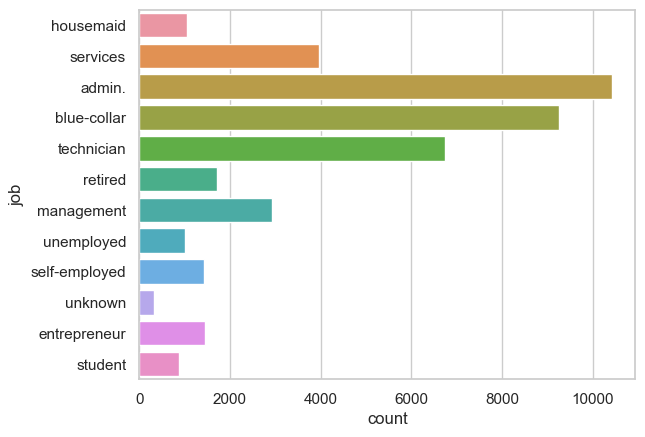

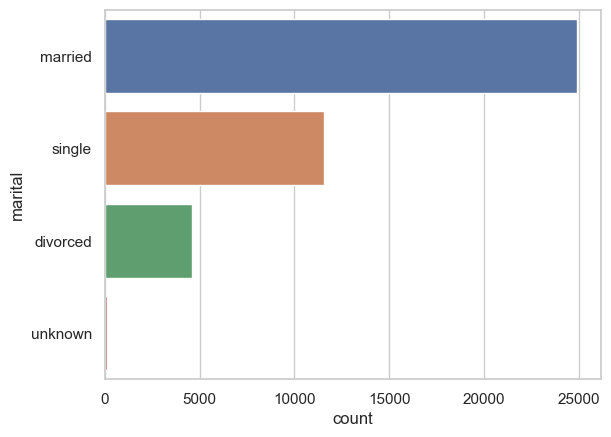

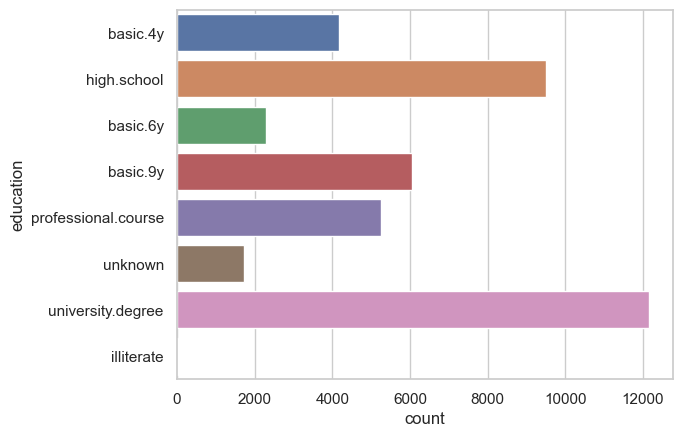

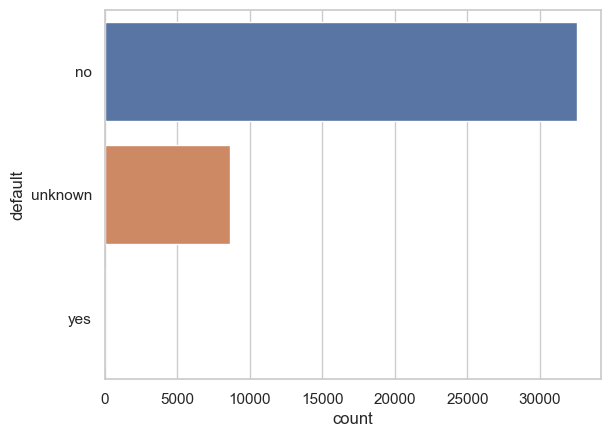

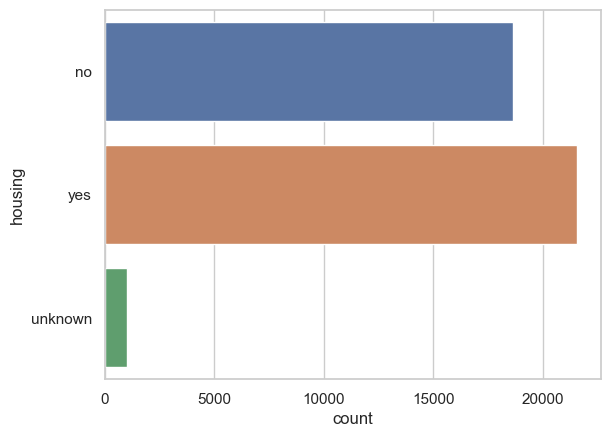

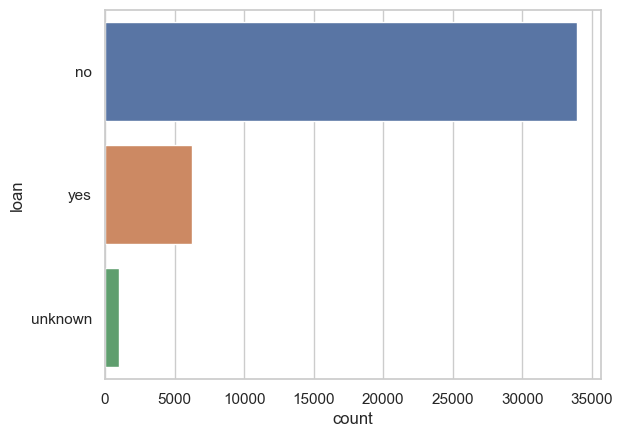

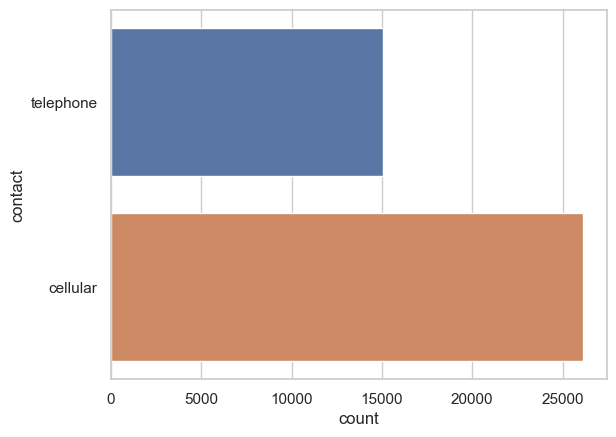

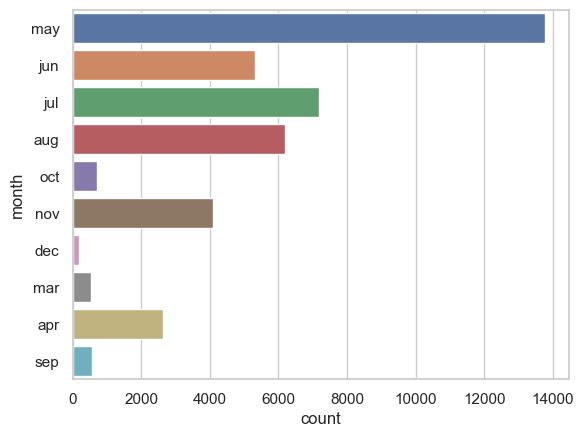

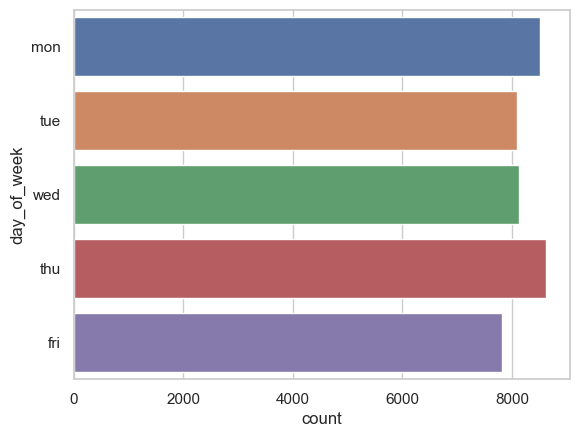

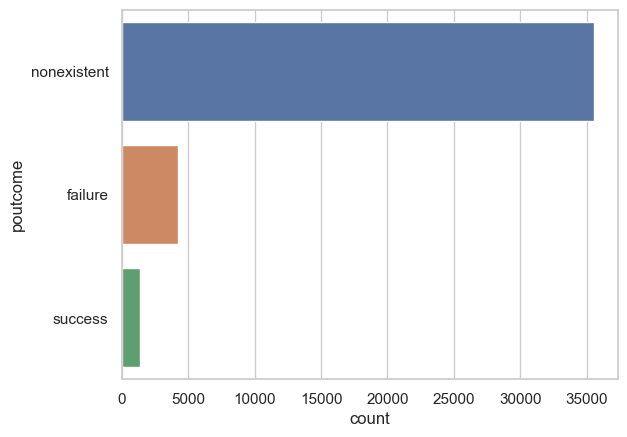

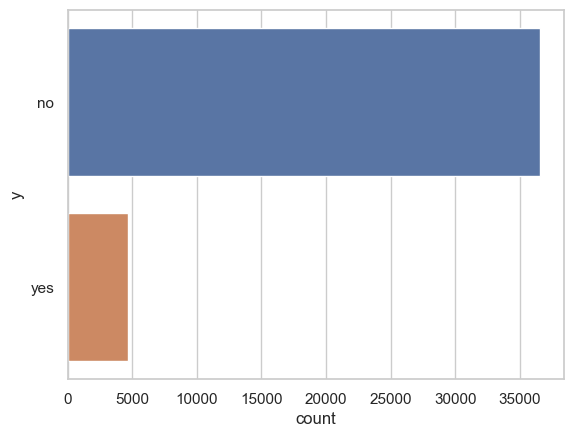

In [24]:
#kategoricki_atributi = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
#Nema potrebe hardkodirati
kategoricki_atributi = df.select_dtypes(include='object').columns.tolist()
for a in kategoricki_atributi:
    fig, ax = plt.subplots();
    sns.countplot(data=df, y=a, ax=ax);

Procenat neprihvaćenih i prihvaćenih ponuda
 y
no     88.734583
yes    11.265417
Name: y, dtype: float64


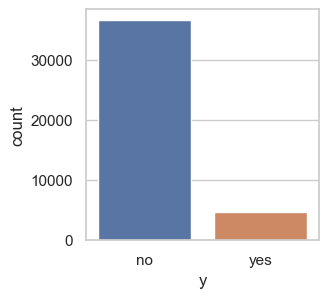

In [25]:
print("Procenat neprihvaćenih i prihvaćenih ponuda\n",df.groupby("y")["y"].count()/len(df)*100)
fig, ax = plt.subplots(figsize=(3,3))
sns.countplot(data=df, x = "y", ax=ax);

Zaključak je da je dataset poprilično nebalansiran i stoga kao meru efikasnosti nije moguće koristiti (accuracy), već je potrebno koristiti kombinovanu f meru ili područje ispod ROC krive. Takođe se kao potencijalno rešenje nameće balansiranje skupa podataka nekom od metoda.

In [26]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


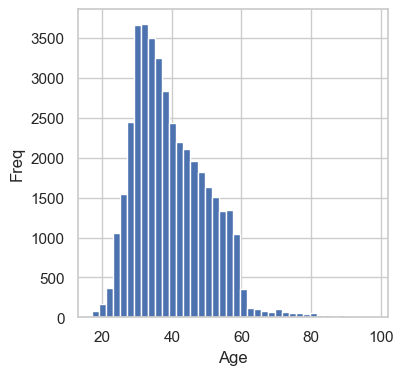

In [27]:
fig, ax = plt.subplots(figsize=(4,4))
ax.set_xlabel("Age")
ax.set_ylabel("Freq")
df["age"].hist(bins=40, ax=ax);

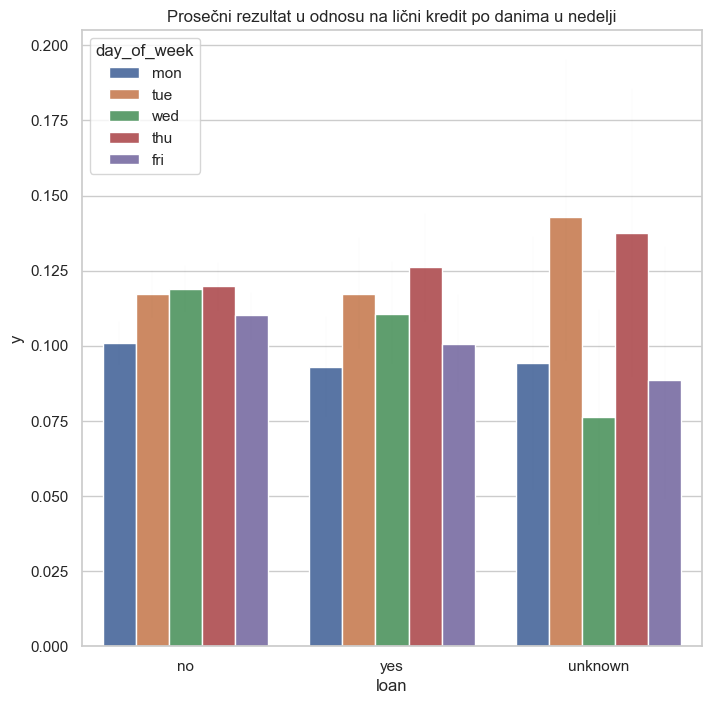

In [28]:
#pretvaranje kategorickog odredisnog atributa (labele) u numericki (0,1)
label_encoder = LabelEncoder()
label_encoder.fit(df["y"])
df["y"] = label_encoder.transform(df["y"])

fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(x = 'loan', y = 'y', hue = 'day_of_week', data = df, errwidth = 0.01, ax=ax)
plt.title('Prosečni rezultat u odnosu na lični kredit po danima u nedelji');

In [29]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


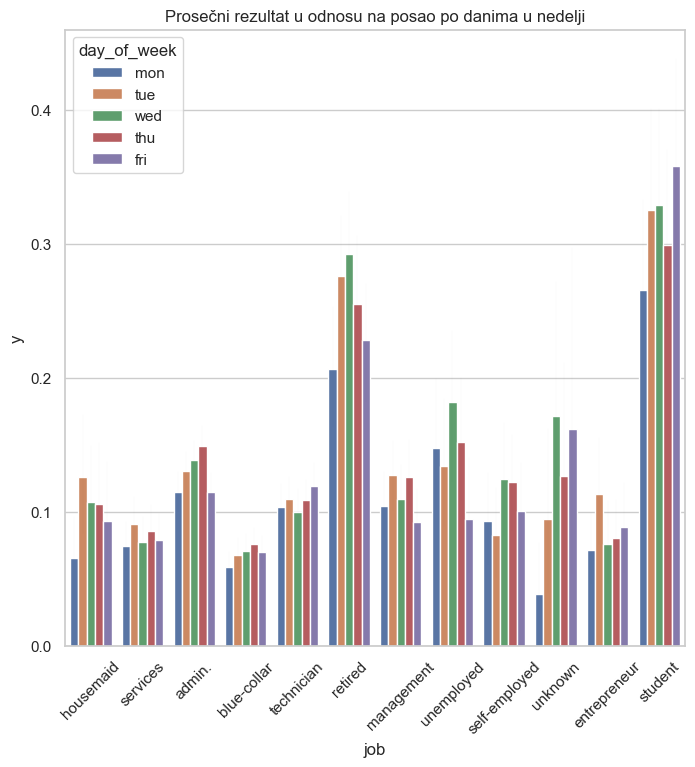

In [30]:
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(x = 'job', y = 'y', hue = 'day_of_week', data = df, errwidth = 0.01, ax=ax)
plt.title('Prosečni rezultat u odnosu na posao po danima u nedelji');
plt.xticks(rotation=45);

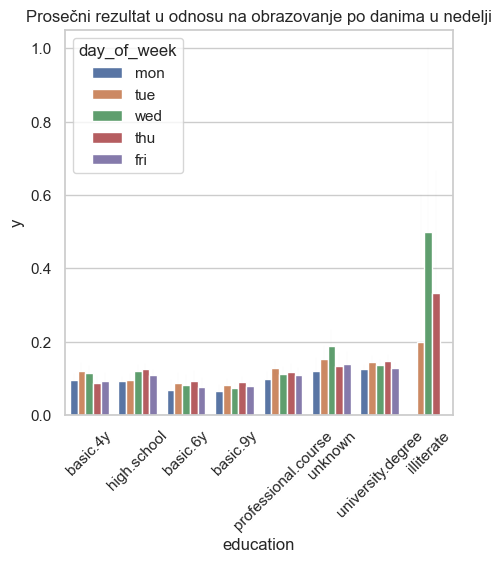

In [31]:
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x = 'education', y = 'y', hue = 'day_of_week', data = df, errwidth = 0.01, ax=ax)
plt.title('Prosečni rezultat u odnosu na obrazovanje po danima u nedelji')
plt.xticks(rotation=45);

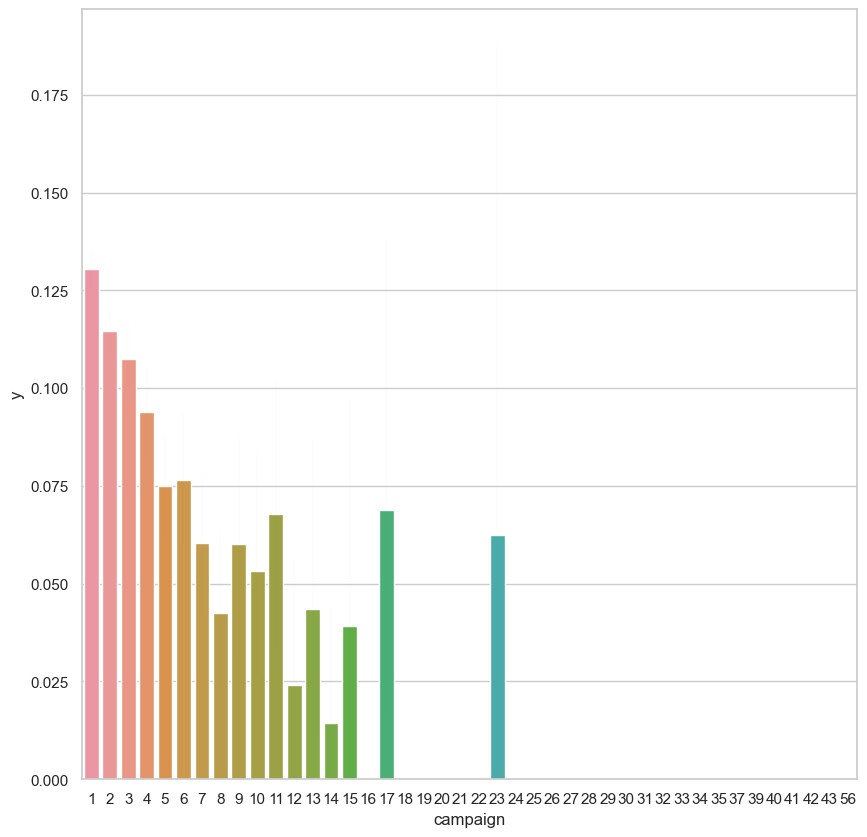

In [32]:
# uspeh u zavisnosti od toga koliko je klijent puta pozvan

fig, ax = plt.subplots(figsize=(10,10))

sns.barplot(data=df, x="campaign", y="y", errwidth=0.01);

y                0     1
poutcome                
failure       3647   605
nonexistent  32422  3141
success        479   894


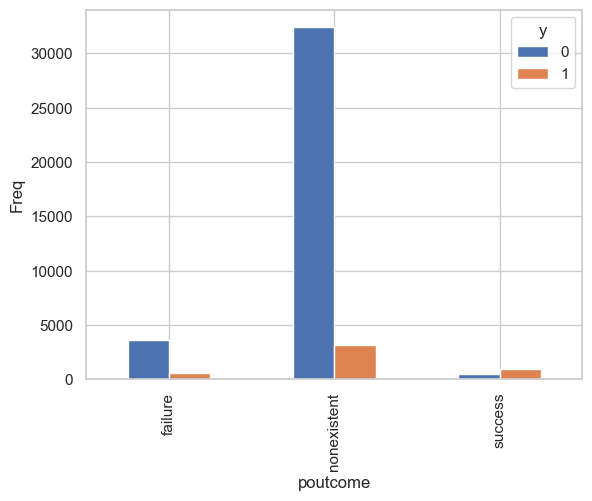

In [33]:
print(pd.crosstab(df.poutcome, df.y))
pd.crosstab(df.poutcome, df.y).plot(kind="bar", ylabel="Freq");

## Transformacija i uklanjanje atributa

In [34]:
#binarni atributi, zbog toga je u redu koristiti label_encoder
labels = ['housing', 'default', 'loan']
for label in labels:
    label_encoder = LabelEncoder()
    label_encoder.fit(df[label])
    df[label] = label_encoder.transform(df[label])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,1,0,0,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0,2,0,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,0,2,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


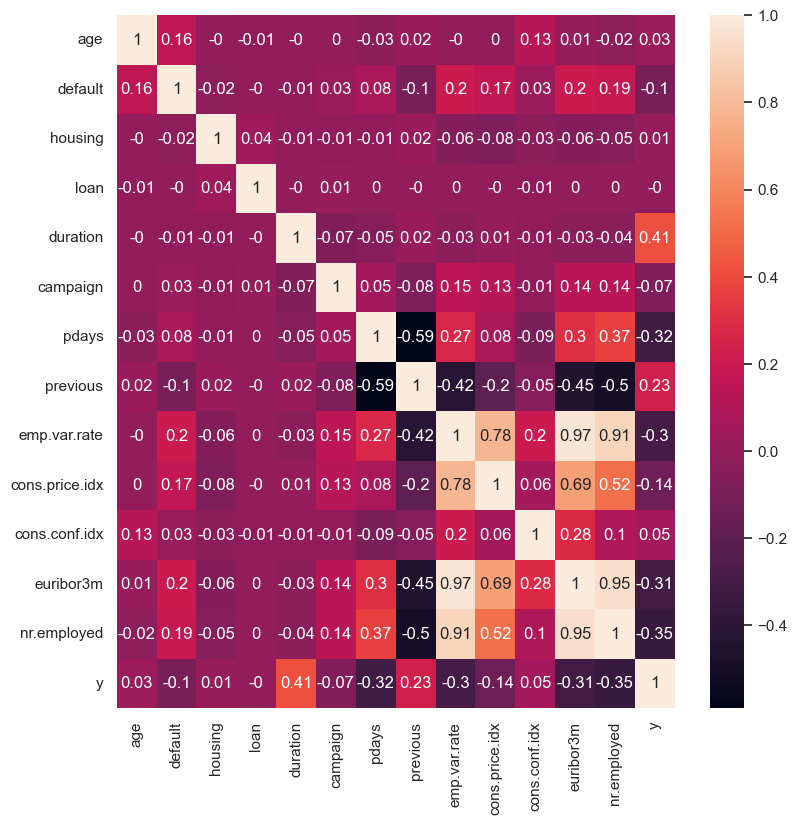

In [35]:
df_corr = df.corr()
df_corr = df_corr.apply(lambda x: round(x, 2))
fig, ax = plt.subplots(figsize = (9,9))
sns.heatmap(data=df_corr, annot=True, ax=ax);

Vidimo da postoji visoka korelacija između sledećih atributa (euribor3m - emp.var.rate), (nr.employed - emp.var.rate), (cons.price.idx - emp.var.rate), (nr.employed - euribor), (cons.price.idx - euribor3m).
Ovo direktno ukazuje na to da postoji neka vrsta linearne povezanosti između ovih atributa. Samim tim, ovo je prilika da se redukuje broj atributa.

Shodno ovome, odstranićemo sledeće atribute:
emp.var.rate, nr.employed, cons.price.idx

In [36]:
konacni_df = df.drop(["emp.var.rate", "nr.employed", "cons.price.idx"], axis=1)
konacni_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,261,1,999,0,nonexistent,-36.4,4.857,0
1,57,services,married,high.school,1,0,0,telephone,may,mon,149,1,999,0,nonexistent,-36.4,4.857,0
2,37,services,married,high.school,0,2,0,telephone,may,mon,226,1,999,0,nonexistent,-36.4,4.857,0
3,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,151,1,999,0,nonexistent,-36.4,4.857,0
4,56,services,married,high.school,0,0,2,telephone,may,mon,307,1,999,0,nonexistent,-36.4,4.857,0


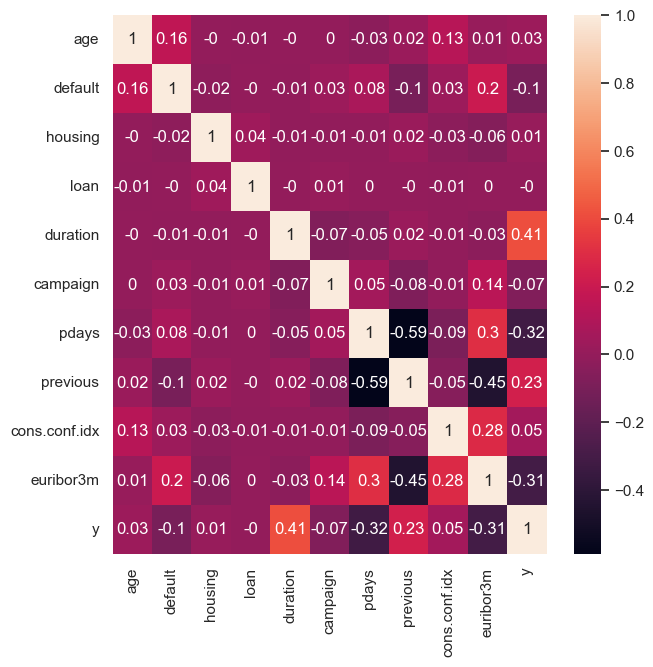

In [37]:
df_corr_konacni = konacni_df.corr()
df_corr_konacni = df_corr_konacni.apply(lambda x: round(x, 2))
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(data=df_corr_konacni, annot=True, ax=ax);

In [38]:
#Uklanjanje duplikata
dups = konacni_df.duplicated()
print("Broj duplikata pre brisanja:", dups.sum())
konacni_df.drop_duplicates(inplace=True)
print("Broj duplikata posle brisanja:", konacni_df.duplicated().sum())

Broj duplikata pre brisanja: 12
Broj duplikata posle brisanja: 0


In [39]:
# provlacenje kategorickih atributa kroz one hot encoder
cols = ['job', 'contact', 'marital','education', 'poutcome', 'month', 'day_of_week']
konacni_df = pd.get_dummies(data=konacni_df, columns=cols)
konacni_df.head()

,age,default,housing,loan,duration,campaign,pdays,previous,cons.conf.idx,euribor3m,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,0,0,0,261,1,999,0,-36.4,4.857,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,57,1,0,0,149,1,999,0,-36.4,4.857,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,37,0,2,0,226,1,999,0,-36.4,4.857,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,40,0,0,0,151,1,999,0,-36.4,4.857,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,56,0,0,2,307,1,999,0,-36.4,4.857,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [40]:
#provera da li su sada svi atributi numericki
konacni_df.dtypes

age                                int64
default                            int32
housing                            int32
loan                               int32
duration                           int64
campaign                           int64
pdays                              int64
previous                           int64
cons.conf.idx                    float64
euribor3m                        float64
y                                  int32
job_admin.                         uint8
job_blue-collar                    uint8
job_entrepreneur                   uint8
job_housemaid                      uint8
job_management                     uint8
job_retired                        uint8
job_self-employed                  uint8
job_services                       uint8
job_student                        uint8
job_technician                     uint8
job_unemployed                     uint8
job_unknown                        uint8
contact_cellular                   uint8
contact_telephon

In [41]:
konacni_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.023800,10.420680,17.000,32.000,38.000,47.000,98.000
default,41176.0,0.208908,0.406713,0.000,0.000,0.000,0.000,2.000
housing,41176.0,1.071789,0.985305,0.000,0.000,2.000,2.000,2.000
loan,41176.0,0.327521,0.723700,0.000,0.000,0.000,0.000,2.000
duration,41176.0,258.315815,259.305321,0.000,102.000,180.000,319.000,4918.000
campaign,41176.0,2.567879,2.770318,1.000,1.000,2.000,3.000,56.000
pdays,41176.0,962.464810,186.937102,0.000,999.000,999.000,999.000,999.000
previous,41176.0,0.173013,0.494964,0.000,0.000,0.000,0.000,7.000
cons.conf.idx,41176.0,-40.502863,4.627860,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41176.0,3.621293,1.734437,0.634,1.344,4.857,4.961,5.045


## Normalizacija atributa

In [42]:
labels = konacni_df.y
scaler = MinMaxScaler()
normalizovani_df = pd.DataFrame(scaler.fit_transform(konacni_df.drop(['y'], axis = 1)), columns = konacni_df.drop(['y'], axis = 1).columns)

In [43]:
normalizovani_df.head()

,age,default,housing,loan,duration,campaign,pdays,previous,cons.conf.idx,euribor3m,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0.481481,0.0,0.0,0.0,0.053070,0.0,1.0,0.0,0.60251,0.957379,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.493827,0.5,0.0,0.0,0.030297,0.0,1.0,0.0,0.60251,0.957379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.246914,0.0,1.0,0.0,0.045954,0.0,1.0,0.0,0.60251,0.957379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.283951,0.0,0.0,0.0,0.030704,0.0,1.0,0.0,0.60251,0.957379,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.481481,0.0,0.0,1.0,0.062424,0.0,1.0,0.0,0.60251,0.957379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Podela podakata na trening i test skup

In [44]:
X = normalizovani_df

y = konacni_df["y"]

X.shape[0], y.shape[0]

(41176, 41176)

In [45]:
y.head(), y.value_counts()

(0    0
 1    0
 2    0
 3    0
 4    0
 Name: y, dtype: int32,
 0    36537
 1     4639
 Name: y, dtype: int64)

In [46]:
# izbor algoritma cross validacije
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 1)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32940, 54), (8236, 54), (32940,), (8236,))

Kreiranje testing dataseta, koji će služiti za upoređivanje primenjenih algoritama

In [48]:
testing = pd.DataFrame(columns=["Algoritam", "Kombinovana f mera", "Područje ispod ROC krive", "Accuracy"])
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy


## Random Forest Classifier
Inicijalni rezultati, bez podesavanja bilo kakvih parametara

In [49]:
np.random.seed(42)
model_rfc_bez_parametara = RandomForestClassifier()
model_rfc_bez_parametara.fit(X_train, y_train)

pred = model_rfc_bez_parametara.predict(X_test)
f1 = f1_score(y_test, model_rfc_bez_parametara.predict(X_test))
auc = roc_auc_score(y_test, model_rfc_bez_parametara.predict(X_test))
acc = accuracy_score(y_test, model_rfc_bez_parametara.predict(X_test))

print("Kombinovana F mera je : %0.3f" %f1)
print("Podrucje ispod ROC krive je: %0.3f" %auc)
print("Accuracy je: %0.3f" %acc)

testing.loc[-1] = ["Random Forest bez podešavanja hiperparametara", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

Kombinovana F mera je : 0.540
Podrucje ispod ROC krive je: 0.717
Accuracy je: 0.909


In [50]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,Random Forest bez podešavanja hiperparametara,0.539975,0.716766,0.909179


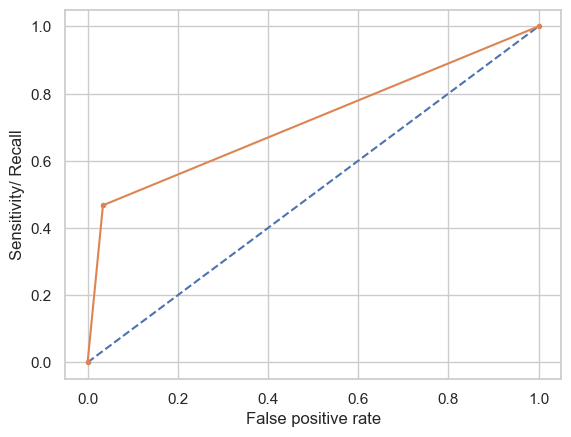

In [51]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('Sensitivity/ Recall')
# show the plot
plt.show()

## Random Forest Classifier
Sa podešavanjem hiperparametara

In [52]:
np.random.seed(42)
# Podešavanje hiperparametara i kreiranje modela
params = {
            "n_estimators" : [100, 200], 
            "criterion" : ["gini", "entropy"], 
            "max_depth" : [15, 25, None],
            "min_samples_split" : [3, 6], 
            "min_samples_leaf" : [2, 4]
}
model_rfc_sa_parametrima = GridSearchCV(estimator = RandomForestClassifier(class_weight = "balanced", n_jobs = -1), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "roc_auc")
model_rfc_sa_parametrima.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 25, None],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [3, 6],
                         'n_estimators': [100, 200]},
             scoring='roc_auc')

In [53]:
f1_score(y_test, model_rfc_sa_parametrima.predict(X_test))

0.6381766381766382

In [54]:
model_rfc_sa_parametrima.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 200}

In [55]:
model_rfc_sa_parametrima.best_score_

0.947433726476134

In [56]:
f1 = f1_score(y_test, model_rfc_sa_parametrima.predict(X_test))
auc = roc_auc_score(y_test, model_rfc_sa_parametrima.predict(X_test))
acc = accuracy_score(y_test, model_rfc_sa_parametrima.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Random Forest sa podešenim hiperparametrima", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.638
Area under ROC on test data is : 0.867
Accuracy on test data is : 0.892


In [57]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,Random Forest sa podešenim hiperparametrima,0.638177,0.867171,0.892059
1,Random Forest bez podešavanja hiperparametara,0.539975,0.716766,0.909179


## Logistic Regression
inicijalni rezultati, bez podešavanja bilo kakvih parametara

In [58]:
np.random.seed(42)
model_lr_bez_parametara = LogisticRegression()
model_lr_bez_parametara.fit(X_train, y_train)

pred = model_lr_bez_parametara.predict(X_test)
f1 = f1_score(y_test, model_lr_bez_parametara.predict(X_test))
auc = roc_auc_score(y_test, model_lr_bez_parametara.predict(X_test))
acc = accuracy_score(y_test, model_lr_bez_parametara.predict(X_test))

print("Kombinovana F mera je : %0.3f" %f1)
print("Podrucje ispod ROC krive je: %0.3f" %auc)
print("Accuracy je: %0.3f" %acc)

testing.loc[-1] = ["Logistic Regression bez podešavanja hiperparametara", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

Kombinovana F mera je : 0.465
Podrucje ispod ROC krive je: 0.669
Accuracy je: 0.904


In [59]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,Logistic Regression bez podešavanja hiperparam...,0.465085,0.669416,0.904201
1,Random Forest sa podešenim hiperparametrima,0.638177,0.867171,0.892059
2,Random Forest bez podešavanja hiperparametara,0.539975,0.716766,0.909179


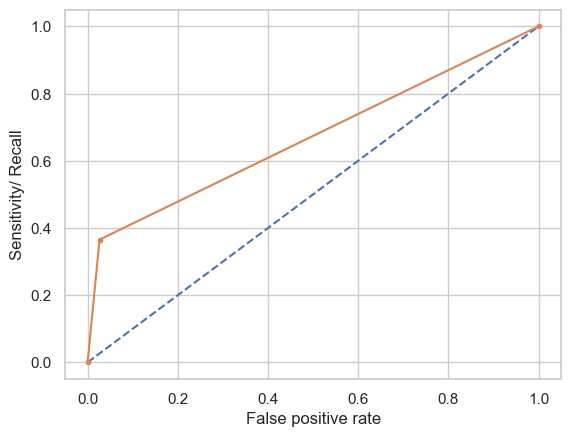

In [60]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('Sensitivity/ Recall')
# show the plot
plt.show()

## Logistic Regression
Sa podešavanjem hiperparametara

In [61]:
params2 = [
            {
                "penalty" : ['l2'], 
                "C" : [0.01, 0.1, 1.0, 10.0], 
                "solver" : ["sag"], 
                "max_iter" : [100, 200]
            },
            {
                "penalty" : ['l1'], 
                "C" : [0.01, 0.1, 1.0, 10.0], 
                "solver" : ["saga"], 
                "max_iter" : [100, 200]
            }
]
model_lr_sa_parametrima = GridSearchCV(estimator = LogisticRegression(n_jobs = -1, class_weight = "balanced"), param_grid = params2, cv = cv, 
                   n_jobs = -1, scoring = "roc_auc")
model_lr_sa_parametrima.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced', n_jobs=-1),
             n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1.0, 10.0], 'max_iter': [100, 200],
                          'penalty': ['l2'], 'solver': ['sag']},
                         {'C': [0.01, 0.1, 1.0, 10.0], 'max_iter': [100, 200],
                          'penalty': ['l1'], 'solver': ['saga']}],
             scoring='roc_auc')

In [62]:
model_lr_sa_parametrima.best_params_

{'C': 1.0, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}

In [63]:
model_lr_sa_parametrima.best_score_

0.9355014419344105

In [64]:
f1 = f1_score(y_test, model_lr_sa_parametrima.predict(X_test))
auc = roc_auc_score(y_test, model_lr_sa_parametrima.predict(X_test))
acc = accuracy_score(y_test, model_lr_sa_parametrima.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Logistic Regression sa parametrima", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.588
Area under ROC on test data is : 0.868
Accuracy on test data is : 0.860


In [65]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,Logistic Regression sa parametrima,0.588110,0.868293,0.859519
1,Logistic Regression bez podešavanja hiperparam...,0.465085,0.669416,0.904201
2,Random Forest sa podešenim hiperparametrima,0.638177,0.867171,0.892059
3,Random Forest bez podešavanja hiperparametara,0.539975,0.716766,0.909179


## Decision Tree
inicijalni rezultati, bez podešavanja bilo kakvih parametara

In [66]:
np.random.seed(42)
model_dt_bez_parametara = DecisionTreeClassifier()
model_dt_bez_parametara.fit(X_train, y_train)

pred = model_dt_bez_parametara.predict(X_test)
f1 = f1_score(y_test, model_dt_bez_parametara.predict(X_test))
auc = roc_auc_score(y_test, model_dt_bez_parametara.predict(X_test))
acc = accuracy_score(y_test, model_dt_bez_parametara.predict(X_test))

print("Kombinovana F mera je : %0.3f" %f1)
print("Podrucje ispod ROC krive je: %0.3f" %auc)
print("Accuracy je: %0.3f" %acc)

testing.loc[-1] = ["Decision Tree bez podešavanja hiperparametara", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

Kombinovana F mera je : 0.517
Podrucje ispod ROC krive je: 0.731
Accuracy je: 0.888


In [67]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,Decision Tree bez podešavanja hiperparametara,0.517475,0.731083,0.887688
1,Logistic Regression sa parametrima,0.588110,0.868293,0.859519
2,Logistic Regression bez podešavanja hiperparam...,0.465085,0.669416,0.904201
3,Random Forest sa podešenim hiperparametrima,0.638177,0.867171,0.892059
4,Random Forest bez podešavanja hiperparametara,0.539975,0.716766,0.909179


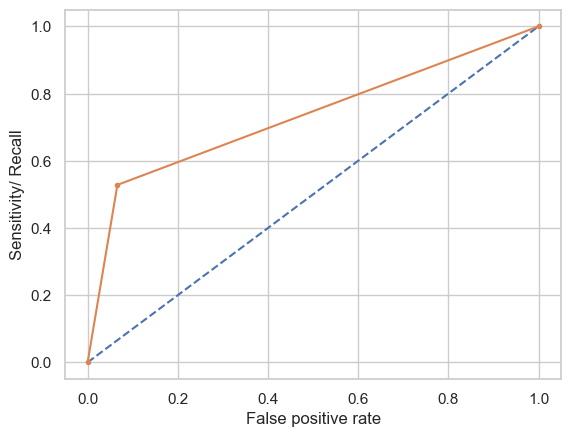

In [68]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('Sensitivity/ Recall')
# show the plot
plt.show()

## Decision Tree
Sa korišćenjem hiperparametara

In [69]:
np.random.seed(42)
params3 = {
            "criterion" : ["gini", "entropy"], 
            "splitter" : ["best", "random"], 
            "max_depth" : [20, 40, None],
            "min_samples_split" : [3, 6], 
            "min_samples_leaf" : [2, 4],  
        }
model_dt_sa_parametrima = GridSearchCV(estimator = DecisionTreeClassifier(class_weight = "balanced"), param_grid = params3, cv = cv, 
                   n_jobs = -1, scoring = "roc_auc")
model_dt_sa_parametrima.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 40, None],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [3, 6],
                         'splitter': ['best', 'random']},
             scoring='roc_auc')

In [70]:
model_dt_sa_parametrima.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'splitter': 'random'}

In [71]:
model_dt_sa_parametrima.best_score_

0.8496338318482641

In [72]:
f1 = f1_score(y_test, model_dt_sa_parametrima.predict(X_test))
auc = roc_auc_score(y_test, model_dt_sa_parametrima.predict(X_test))
acc = accuracy_score(y_test, model_dt_sa_parametrima.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Decision Tree sa hiperparametrima", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.553
Area under ROC on test data is : 0.815
Accuracy on test data is : 0.860


In [73]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,Decision Tree sa hiperparametrima,0.552744,0.815022,0.860491
1,Decision Tree bez podešavanja hiperparametara,0.517475,0.731083,0.887688
2,Logistic Regression sa parametrima,0.588110,0.868293,0.859519
3,Logistic Regression bez podešavanja hiperparam...,0.465085,0.669416,0.904201
4,Random Forest sa podešenim hiperparametrima,0.638177,0.867171,0.892059
5,Random Forest bez podešavanja hiperparametara,0.539975,0.716766,0.909179


## Gaussian Naive Bayes

In [74]:
model_gnb = GridSearchCV(estimator = GaussianNB(), param_grid = {}, cv = cv, n_jobs = -1, scoring = "roc_auc")
model_gnb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=GaussianNB(), n_jobs=-1, param_grid={},
             scoring='roc_auc')

In [75]:
model_gnb.best_score_

0.8291141577624137

In [76]:
f1 = f1_score(y_test, model_gnb.predict(X_test))
auc = roc_auc_score(y_test, model_gnb.predict(X_test))
acc = accuracy_score(y_test, model_gnb.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Gaussian Naive Bayes", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.446
Area under ROC on test data is : 0.691
Accuracy on test data is : 0.870


In [77]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,Gaussian Naive Bayes,0.446170,0.690990,0.870083
1,Decision Tree sa hiperparametrima,0.552744,0.815022,0.860491
2,Decision Tree bez podešavanja hiperparametara,0.517475,0.731083,0.887688
3,Logistic Regression sa parametrima,0.588110,0.868293,0.859519
4,Logistic Regression bez podešavanja hiperparam...,0.465085,0.669416,0.904201
5,Random Forest sa podešenim hiperparametrima,0.638177,0.867171,0.892059
6,Random Forest bez podešavanja hiperparametara,0.539975,0.716766,0.909179


## Balansiranje dataseta
Korišćenjem undersamplinga

In [78]:
konacni_df_sa_y=normalizovani_df.copy()
konacni_df_sa_y["y"] = y.tolist()
konacni_df_sa_y["y"].isnull().any().sum()

0

In [79]:
prevladavajuca_klasa = konacni_df_sa_y[konacni_df_sa_y.y == 1].shape[0] > konacni_df_sa_y[konacni_df_sa_y.y == 0].shape[0]

In [80]:
df_prevladavajuca = konacni_df_sa_y[konacni_df_sa_y.y == prevladavajuca_klasa]
df_manje_zastupljena = konacni_df_sa_y[konacni_df_sa_y.y != prevladavajuca_klasa]

df_prevladavajuca.shape[0], df_manje_zastupljena.shape[0]

(36537, 4639)

In [81]:
df_prevladavajuca_undersampled = resample(df_prevladavajuca, 
                                           replace=False, # Ne želimo da dupliramo podatke
                                           n_samples=df_manje_zastupljena.shape[0], # Želimo da imamo jednak broj primera po klasama
                                           random_state=123) # Postavljamo seed za reprodukciju rezultata

df_prevladavajuca_undersampled.shape[0]

4639

In [82]:
df_undersampled = pd.concat([df_manje_zastupljena, df_prevladavajuca_undersampled])
df_undersampled.shape[0]

9278

In [83]:
# Shuffle podataka
df_undersampled = df_undersampled.sample(frac=1).reset_index(drop=True)

In [84]:
y_undersampled = df_undersampled["y"]

X_undersampled = df_undersampled.drop("y", axis=1)

In [85]:
X_undersampled_train, X_undersampled_test, y_undersampled_train, y_undersampled_test = train_test_split(X_undersampled, y_undersampled, test_size=0.2)

In [86]:
y_undersampled_train.isnull().any().sum()

0

In [87]:
X_undersampled.head()

,age,default,housing,loan,duration,campaign,pdays,previous,cons.conf.idx,euribor3m,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0.407407,0.0,0.0,0.0,0.143351,0.000000,1.000000,0.000000,0.368201,0.767853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.555556,0.0,1.0,0.0,0.066897,0.000000,1.000000,0.285714,0.000000,0.090002,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.283951,0.5,1.0,0.0,0.010573,0.000000,1.000000,0.000000,0.376569,0.980957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.456790,0.0,1.0,0.0,0.064457,0.090909,0.006006,0.142857,0.054393,0.080027,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.172840,0.0,1.0,0.0,0.058967,0.145455,1.000000,0.000000,0.615063,0.981410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Random forest nad balansiranim skupom

In [88]:
# Podešavanje hiperparametara i kreiranje modela
np.random.seed(42)
params4 = {
            "n_estimators" : [100, 200], 
            "criterion" : ["gini", "entropy"], 
            "max_depth" : [15, 25, None],
            "min_samples_split" : [3, 6], 
            "min_samples_leaf" : [2, 4]
}
model_rf_sa_parametrima_balansiran = GridSearchCV(estimator = RandomForestClassifier(class_weight = "balanced", n_jobs = -1), param_grid = params4, cv = cv, 
                   n_jobs = -1, scoring = "roc_auc")
model_rf_sa_parametrima_balansiran.fit(X_undersampled_train, y_undersampled_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 25, None],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [3, 6],
                         'n_estimators': [100, 200]},
             scoring='roc_auc')

In [89]:
model_rf_sa_parametrima_balansiran.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 100}

In [90]:
model_rf_sa_parametrima_balansiran.best_score_

0.9412309762915415

In [91]:
f1 = f1_score(y_undersampled_test, model_rf_sa_parametrima_balansiran.predict(X_undersampled_test))
auc = roc_auc_score(y_undersampled_test, model_rf_sa_parametrima_balansiran.predict(X_undersampled_test))
acc = accuracy_score(y_undersampled_test, model_rf_sa_parametrima_balansiran.predict(X_undersampled_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Random forest nad balansiranim skupom", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.898
Area under ROC on test data is : 0.894
Accuracy on test data is : 0.894


In [92]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,Random forest nad balansiranim skupom,0.898191,0.894170,0.893858
1,Gaussian Naive Bayes,0.446170,0.690990,0.870083
2,Decision Tree sa hiperparametrima,0.552744,0.815022,0.860491
3,Decision Tree bez podešavanja hiperparametara,0.517475,0.731083,0.887688
4,Logistic Regression sa parametrima,0.588110,0.868293,0.859519
5,Logistic Regression bez podešavanja hiperparam...,0.465085,0.669416,0.904201
6,Random Forest sa podešenim hiperparametrima,0.638177,0.867171,0.892059
7,Random Forest bez podešavanja hiperparametara,0.539975,0.716766,0.909179


## Decision Tree nad balansiranim skupom

In [93]:
np.random.seed(42)
params5 = {
            "criterion" : ["gini", "entropy"], 
            "splitter" : ["best", "random"], 
            "max_depth" : [20, 40, None],
            "min_samples_split" : [3, 6], 
            "min_samples_leaf" : [2, 4],  
        }
model_dt_sa_parametrima_balansiran = GridSearchCV(estimator = DecisionTreeClassifier(class_weight = "balanced"), param_grid = params5, cv = cv, 
                   n_jobs = -1, scoring = "roc_auc")
model_dt_sa_parametrima_balansiran.fit(X_undersampled_train, y_undersampled_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 40, None],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [3, 6],
                         'splitter': ['best', 'random']},
             scoring='roc_auc')

In [94]:
model_dt_sa_parametrima_balansiran.best_params_

{'criterion': 'gini',
 'max_depth': 40,
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'splitter': 'best'}

In [95]:
model_dt_sa_parametrima_balansiran.best_score_

0.90084653960963

In [96]:
f1 = f1_score(y_undersampled_test, model_dt_sa_parametrima_balansiran.predict(X_undersampled_test))
auc = roc_auc_score(y_undersampled_test, model_dt_sa_parametrima_balansiran.predict(X_undersampled_test))
acc = accuracy_score(y_undersampled_test, model_dt_sa_parametrima_balansiran.predict(X_undersampled_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Decision Tree nad balansiranim skupom", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.839
Area under ROC on test data is : 0.844
Accuracy on test data is : 0.844


In [97]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,Decision Tree nad balansiranim skupom,0.839176,0.844119,0.844289
1,Random forest nad balansiranim skupom,0.898191,0.894170,0.893858
2,Gaussian Naive Bayes,0.446170,0.690990,0.870083
3,Decision Tree sa hiperparametrima,0.552744,0.815022,0.860491
4,Decision Tree bez podešavanja hiperparametara,0.517475,0.731083,0.887688
5,Logistic Regression sa parametrima,0.588110,0.868293,0.859519
6,Logistic Regression bez podešavanja hiperparam...,0.465085,0.669416,0.904201
7,Random Forest sa podešenim hiperparametrima,0.638177,0.867171,0.892059
8,Random Forest bez podešavanja hiperparametara,0.539975,0.716766,0.909179


## Logistic Regression nad balansiranim skupom

In [98]:
np.random.seed(42)
params6 = [
            {
                "penalty" : ['l2'], 
                "C" : [0.01, 0.1, 1.0, 10.0], 
                "solver" : ["sag"], 
                "max_iter" : [100, 200]
            },
            {
                "penalty" : ['l1'], 
                "C" : [0.01, 0.1, 1.0, 10.0], 
                "solver" : ["saga"], 
                "max_iter" : [100, 200]
            }
]
model_lr_sa_parametrima_balansiran = GridSearchCV(estimator = LogisticRegression(n_jobs = -1, class_weight = "balanced"), param_grid = params6, cv = cv, 
                   n_jobs = -1, scoring = "roc_auc")
model_lr_sa_parametrima_balansiran.fit(X_undersampled_train, y_undersampled_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced', n_jobs=-1),
             n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1.0, 10.0], 'max_iter': [100, 200],
                          'penalty': ['l2'], 'solver': ['sag']},
                         {'C': [0.01, 0.1, 1.0, 10.0], 'max_iter': [100, 200],
                          'penalty': ['l1'], 'solver': ['saga']}],
             scoring='roc_auc')

In [99]:
model_lr_sa_parametrima_balansiran.best_params_

{'C': 10.0, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}

In [100]:
model_lr_sa_parametrima_balansiran.best_score_

0.9315570011139526

In [101]:
f1 = f1_score(y_undersampled_test, model_lr_sa_parametrima_balansiran.predict(X_undersampled_test))
auc = roc_auc_score(y_undersampled_test, model_lr_sa_parametrima_balansiran.predict(X_undersampled_test))
acc = accuracy_score(y_undersampled_test, model_lr_sa_parametrima_balansiran.predict(X_undersampled_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Logistic Regression nad balansiranim skupom", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.870
Area under ROC on test data is : 0.870
Accuracy on test data is : 0.870


In [102]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,Logistic Regression nad balansiranim skupom,0.870081,0.870184,0.870151
1,Decision Tree nad balansiranim skupom,0.839176,0.844119,0.844289
2,Random forest nad balansiranim skupom,0.898191,0.894170,0.893858
3,Gaussian Naive Bayes,0.446170,0.690990,0.870083
4,Decision Tree sa hiperparametrima,0.552744,0.815022,0.860491
5,Decision Tree bez podešavanja hiperparametara,0.517475,0.731083,0.887688
6,Logistic Regression sa parametrima,0.588110,0.868293,0.859519
7,Logistic Regression bez podešavanja hiperparam...,0.465085,0.669416,0.904201
8,Random Forest sa podešenim hiperparametrima,0.638177,0.867171,0.892059
9,Random Forest bez podešavanja hiperparametara,0.539975,0.716766,0.909179


## Gaussian Naive Bayes nad balansiranim skupom podataka

In [103]:
model_gnb_balansiran = GridSearchCV(estimator = GaussianNB(), param_grid = {}, cv = cv, n_jobs = -1, scoring = "roc_auc")
model_gnb_balansiran.fit(X_undersampled_train, y_undersampled_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=GaussianNB(), n_jobs=-1, param_grid={},
             scoring='roc_auc')

In [104]:
model_gnb_balansiran.best_score_

0.825023166168965

In [105]:
f1 = f1_score(y_undersampled_test, model_gnb_balansiran.predict(X_undersampled_test))
auc = roc_auc_score(y_undersampled_test, model_gnb_balansiran.predict(X_undersampled_test))
acc = accuracy_score(y_undersampled_test, model_gnb_balansiran.predict(X_undersampled_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Gaussian Naive Bayes nad balansiranim skupom", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.638
Area under ROC on test data is : 0.714
Accuracy on test data is : 0.715


In [106]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,Gaussian Naive Bayes nad balansiranim skupom,0.638414,0.713639,0.714978
1,Logistic Regression nad balansiranim skupom,0.870081,0.870184,0.870151
2,Decision Tree nad balansiranim skupom,0.839176,0.844119,0.844289
3,Random forest nad balansiranim skupom,0.898191,0.894170,0.893858
4,Gaussian Naive Bayes,0.446170,0.690990,0.870083
5,Decision Tree sa hiperparametrima,0.552744,0.815022,0.860491
6,Decision Tree bez podešavanja hiperparametara,0.517475,0.731083,0.887688
7,Logistic Regression sa parametrima,0.588110,0.868293,0.859519
8,Logistic Regression bez podešavanja hiperparam...,0.465085,0.669416,0.904201
9,Random Forest sa podešenim hiperparametrima,0.638177,0.867171,0.892059


## Feature Selection

In [107]:
labels = konacni_df_sa_y["y"]
features = normalizovani_df
features.head()

,age,default,housing,loan,duration,campaign,pdays,previous,cons.conf.idx,euribor3m,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0.481481,0.0,0.0,0.0,0.053070,0.0,1.0,0.0,0.60251,0.957379,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.493827,0.5,0.0,0.0,0.030297,0.0,1.0,0.0,0.60251,0.957379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.246914,0.0,1.0,0.0,0.045954,0.0,1.0,0.0,0.60251,0.957379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.283951,0.0,0.0,0.0,0.030704,0.0,1.0,0.0,0.60251,0.957379,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.481481,0.0,0.0,1.0,0.062424,0.0,1.0,0.0,0.60251,0.957379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [108]:
chivalues = chi2(features, labels)[0]
chi = pd.DataFrame(list(zip(normalizovani_df.columns, chivalues)), columns = ["Features", "chi2"])
chi

,Features,chi2
0,age,2.212863
1,default,160.945551
2,housing,2.515008
3,loan,0.797408
4,duration,357.984549
5,campaign,16.137615
6,pdays,158.015941
7,previous,441.387744
8,cons.conf.idx,10.761419
9,euribor3m,890.235155


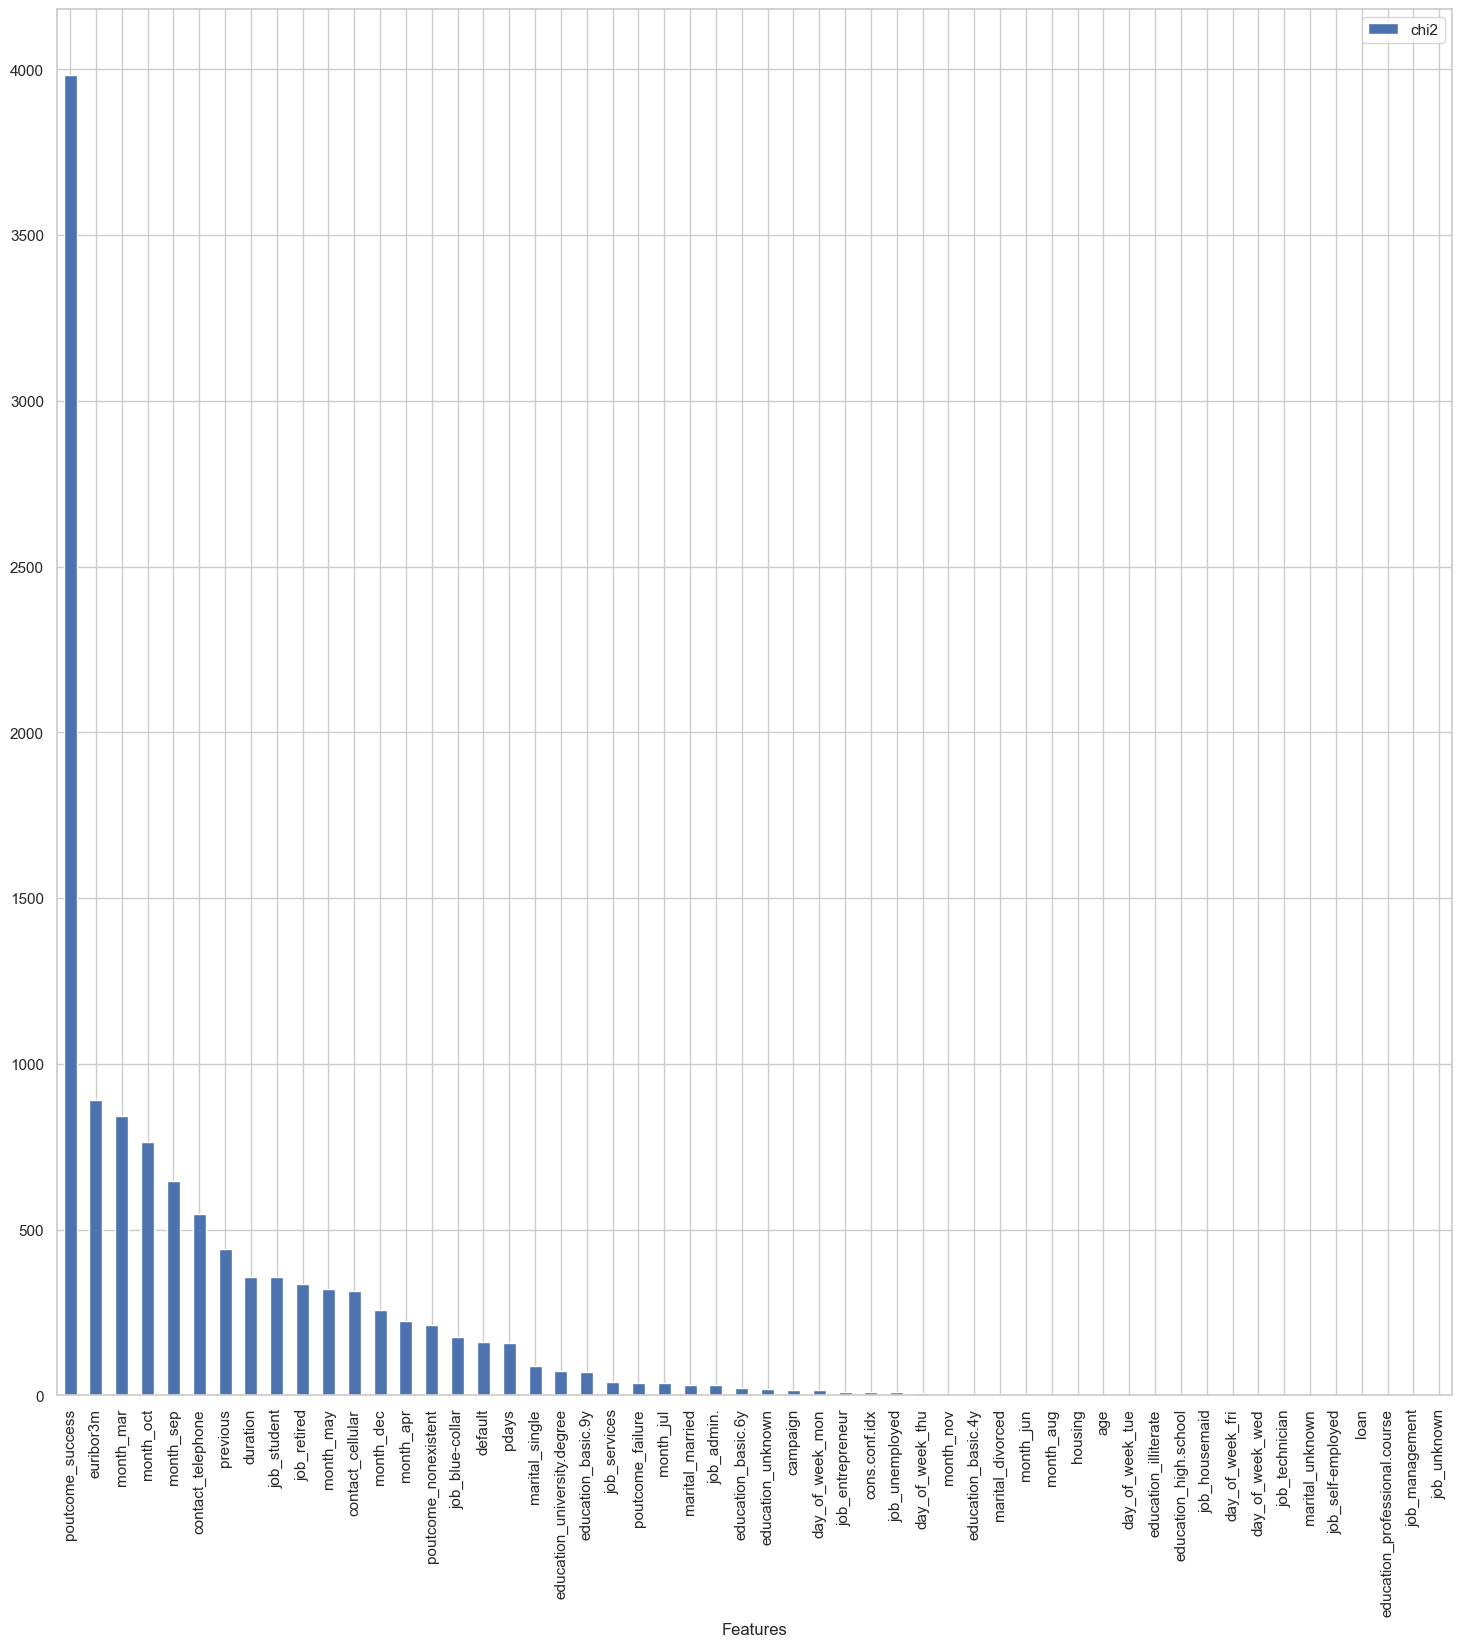

In [109]:
chi.sort_values(by = "chi2", ascending = False).set_index("Features").plot.bar(figsize = (18, 18));

In [110]:
k_best_features = pd.DataFrame(SelectKBest(chi2, k=25).fit_transform(features, labels))

In [111]:
cv2 = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 1)

In [112]:
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(k_best_features, labels, test_size=0.2, random_state=1, stratify = labels)

## Feature Selection nad balansiranim skupom

In [113]:
labels_balansirano = df_undersampled["y"]
features_balansirano = df_undersampled.drop("y", axis=1)
features_balansirano.head()

,age,default,housing,loan,duration,campaign,pdays,previous,cons.conf.idx,euribor3m,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0.407407,0.0,0.0,0.0,0.143351,0.000000,1.000000,0.000000,0.368201,0.767853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.555556,0.0,1.0,0.0,0.066897,0.000000,1.000000,0.285714,0.000000,0.090002,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.283951,0.5,1.0,0.0,0.010573,0.000000,1.000000,0.000000,0.376569,0.980957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.456790,0.0,1.0,0.0,0.064457,0.090909,0.006006,0.142857,0.054393,0.080027,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.172840,0.0,1.0,0.0,0.058967,0.145455,1.000000,0.000000,0.615063,0.981410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [114]:
chivalues_balansirano = chi2(features_balansirano, labels_balansirano)[0]
chi_balansirano = pd.DataFrame(list(zip(df_undersampled.columns, chivalues_balansirano)), columns = ["Features", "chi2"])
chi_balansirano

,Features,chi2
0,age,1.258544
1,default,111.887783
2,housing,0.330906
3,loan,0.115753
4,duration,138.196881
5,campaign,11.313168
6,pdays,93.173484
7,previous,126.007295
8,cons.conf.idx,5.616519
9,euribor3m,625.892380


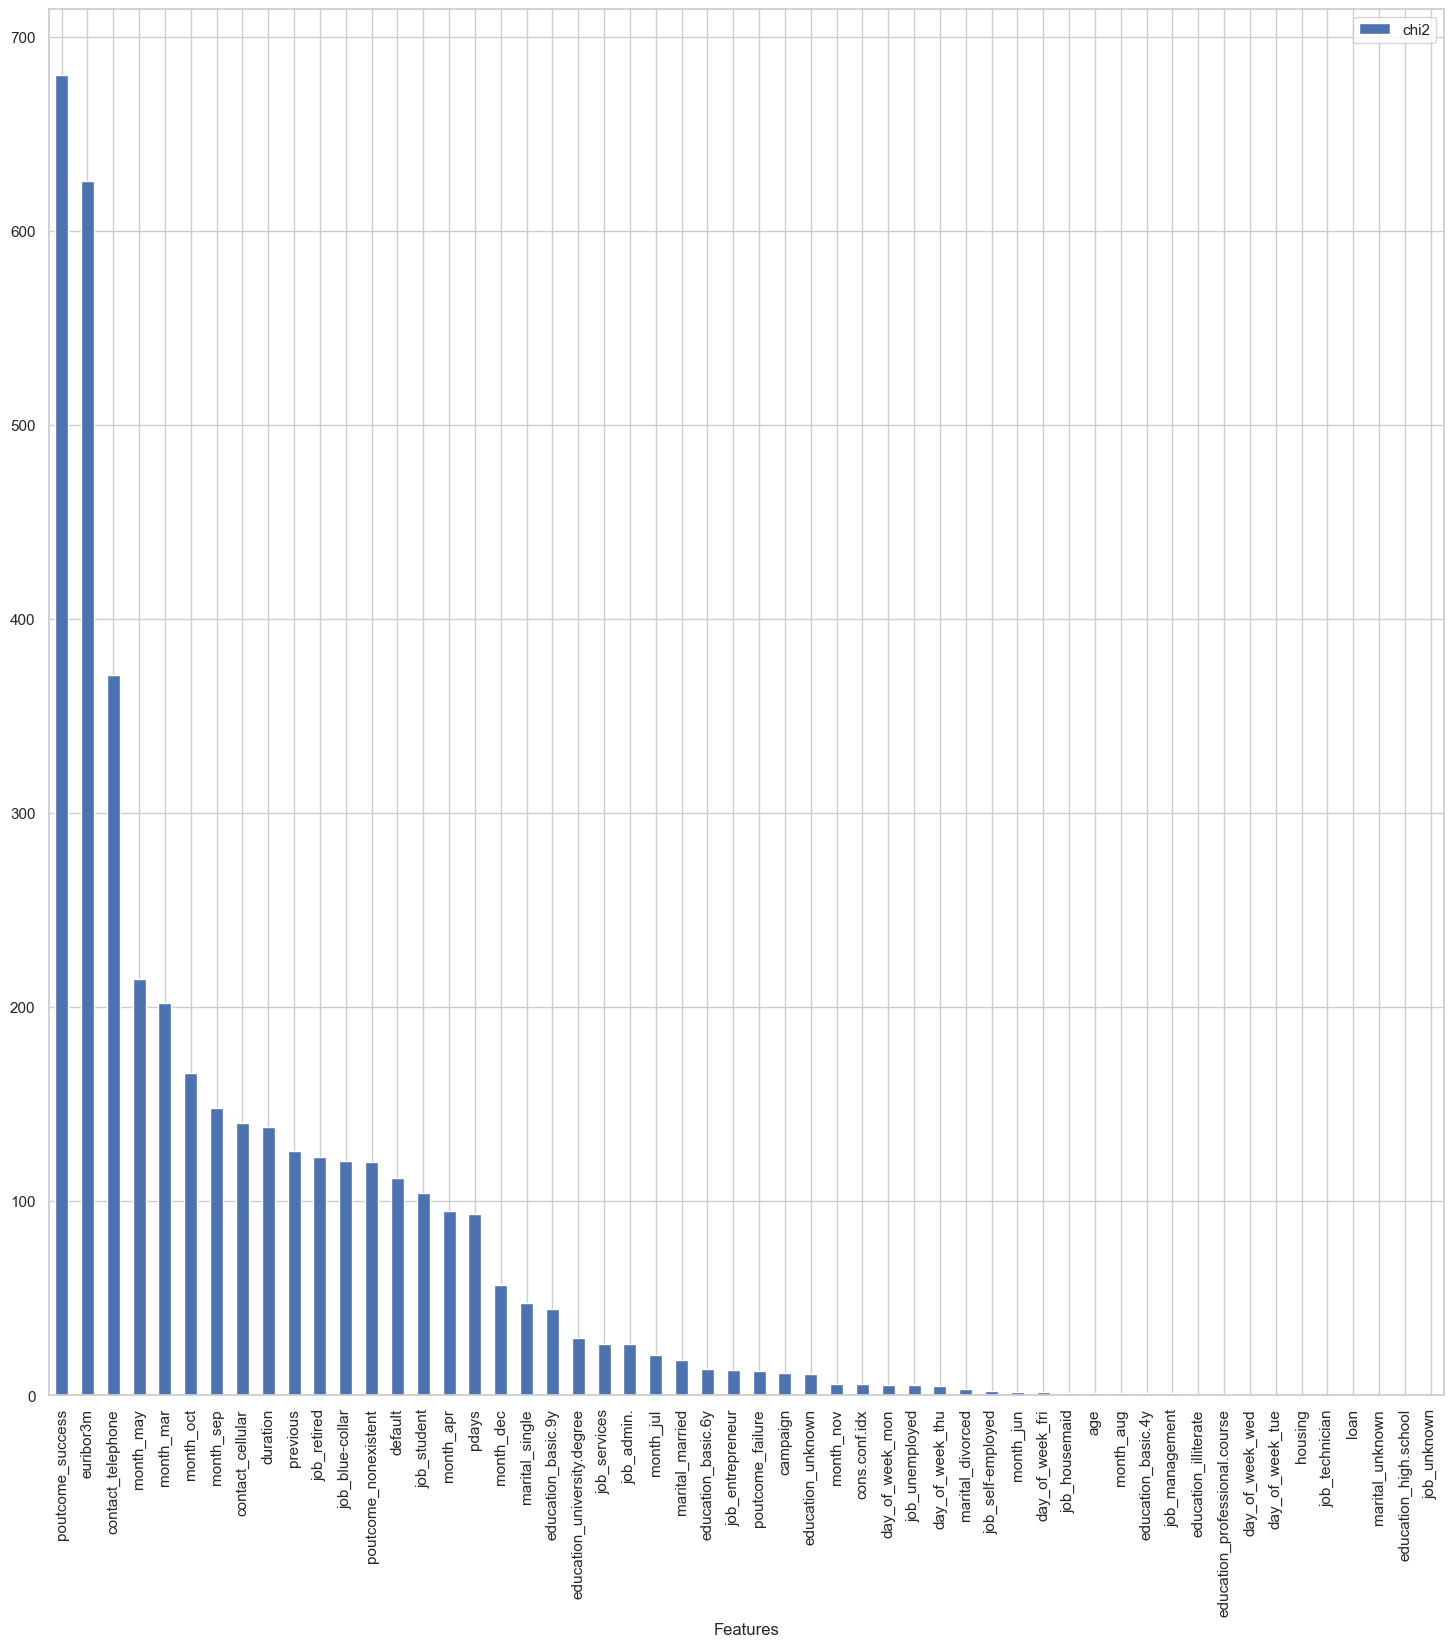

In [115]:
chi_balansirano.sort_values(by = "chi2", ascending = False).set_index("Features").plot.bar(figsize = (18, 18));

In [116]:
k_best_features_balansirano = pd.DataFrame(SelectKBest(chi2, k=25).fit_transform(features_balansirano, labels_balansirano))

In [117]:
X_train_fs_balansirano, X_test_fs_balansirano, y_train_fs_balansirano, y_test_fs_balansirano = train_test_split(k_best_features_balansirano, labels_balansirano, test_size=0.2, random_state=1, stratify = labels_balansirano)

## Logistic Regression za k-best
Nebalansirano

In [118]:
np.random.seed(42)
params7 = [
            {
                "penalty" : ['l2'], 
                "C" : [0.01, 0.1, 1.0], 
                "solver" : ["sag"], 
                "max_iter" : [100, 200]
            },
            {
                "penalty" : ['l1'], 
                "C" : [0.01, 0.1, 1.0, 10.0], 
                "solver" : ["saga"], 
                "max_iter" : [100, 200]
            }
]
model_lr_sa_parametrima_selekcija = GridSearchCV(estimator = LogisticRegression(n_jobs = -1, class_weight = "balanced"), param_grid = params7, cv = cv2, 
                   n_jobs = -1, scoring = "roc_auc")
model_lr_sa_parametrima_selekcija.fit(X_train_fs, y_train_fs)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced', n_jobs=-1),
             n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1.0], 'max_iter': [100, 200],
                          'penalty': ['l2'], 'solver': ['sag']},
                         {'C': [0.01, 0.1, 1.0, 10.0], 'max_iter': [100, 200],
                          'penalty': ['l1'], 'solver': ['saga']}],
             scoring='roc_auc')

In [119]:
model_lr_sa_parametrima_selekcija.best_params_

{'C': 10.0, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}

In [120]:
model_lr_sa_parametrima_selekcija.best_score_

0.9358515389897637

In [121]:
f1 = f1_score(y_test_fs, model_lr_sa_parametrima_selekcija.predict(X_test_fs))
auc = roc_auc_score(y_test_fs, model_lr_sa_parametrima_selekcija.predict(X_test_fs))
acc = accuracy_score(y_test_fs, model_lr_sa_parametrima_selekcija.predict(X_test_fs))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Logistic Regression nakon selekcije ficera (chi-squared)", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.577
Area under ROC on test data is : 0.858
Accuracy on test data is : 0.858


In [122]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,Logistic Regression nakon selekcije ficera (ch...,0.576505,0.857528,0.858184
1,Gaussian Naive Bayes nad balansiranim skupom,0.638414,0.713639,0.714978
2,Logistic Regression nad balansiranim skupom,0.870081,0.870184,0.870151
3,Decision Tree nad balansiranim skupom,0.839176,0.844119,0.844289
4,Random forest nad balansiranim skupom,0.898191,0.894170,0.893858
5,Gaussian Naive Bayes,0.446170,0.690990,0.870083
6,Decision Tree sa hiperparametrima,0.552744,0.815022,0.860491
7,Decision Tree bez podešavanja hiperparametara,0.517475,0.731083,0.887688
8,Logistic Regression sa parametrima,0.588110,0.868293,0.859519
9,Logistic Regression bez podešavanja hiperparam...,0.465085,0.669416,0.904201


## Logistic Regression za k-best
balansirano

In [123]:
np.random.seed(42)
model_lr_sa_parametrima_selekcija_balansirano = GridSearchCV(estimator = LogisticRegression(n_jobs = -1, class_weight = "balanced"), param_grid = params7, cv = cv2, 
                   n_jobs = -1, scoring = "roc_auc")
model_lr_sa_parametrima_selekcija_balansirano.fit(X_train_fs_balansirano, y_train_fs_balansirano)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced', n_jobs=-1),
             n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1.0], 'max_iter': [100, 200],
                          'penalty': ['l2'], 'solver': ['sag']},
                         {'C': [0.01, 0.1, 1.0, 10.0], 'max_iter': [100, 200],
                          'penalty': ['l1'], 'solver': ['saga']}],
             scoring='roc_auc')

In [124]:
model_lr_sa_parametrima_selekcija_balansirano.best_params_

{'C': 1.0, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}

In [125]:
model_lr_sa_parametrima_selekcija_balansirano.best_score_

0.9329423759487921

In [126]:
f1 = f1_score(y_test_fs_balansirano, model_lr_sa_parametrima_selekcija_balansirano.predict(X_test_fs_balansirano))
auc = roc_auc_score(y_test_fs_balansirano, model_lr_sa_parametrima_selekcija_balansirano.predict(X_test_fs_balansirano))
acc = accuracy_score(y_test_fs_balansirano, model_lr_sa_parametrima_selekcija_balansirano.predict(X_test_fs_balansirano))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Logistic Regression (balansirano + fs)", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.873
Area under ROC on test data is : 0.871
Accuracy on test data is : 0.871


In [127]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,Logistic Regression (balansirano + fs),0.873210,0.871228,0.871228
1,Logistic Regression nakon selekcije ficera (ch...,0.576505,0.857528,0.858184
2,Gaussian Naive Bayes nad balansiranim skupom,0.638414,0.713639,0.714978
3,Logistic Regression nad balansiranim skupom,0.870081,0.870184,0.870151
4,Decision Tree nad balansiranim skupom,0.839176,0.844119,0.844289
5,Random forest nad balansiranim skupom,0.898191,0.894170,0.893858
6,Gaussian Naive Bayes,0.446170,0.690990,0.870083
7,Decision Tree sa hiperparametrima,0.552744,0.815022,0.860491
8,Decision Tree bez podešavanja hiperparametara,0.517475,0.731083,0.887688
9,Logistic Regression sa parametrima,0.588110,0.868293,0.859519


## Decision Tree za k-best
Nebalansirano

In [128]:
np.random.seed(42)
params8 = {
            "criterion" : ["gini", "entropy"], 
            "splitter" : ["best", "random"], 
            "max_depth" : [10, 15, 20, None],
            "min_samples_split" : [3, 6], 
            "min_samples_leaf" : [2, 4],  
        }
model_dt_sa_parametrima_selekcija = GridSearchCV(estimator = DecisionTreeClassifier(class_weight = "balanced"), param_grid = params8, cv = cv2, 
                   n_jobs = -1, scoring = "roc_auc")
model_dt_sa_parametrima_selekcija.fit(X_train_fs, y_train_fs)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, None],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [3, 6],
                         'splitter': ['best', 'random']},
             scoring='roc_auc')

In [129]:
model_dt_sa_parametrima_selekcija.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'splitter': 'random'}

In [130]:
model_dt_sa_parametrima_selekcija.best_score_

0.9260258777035311

In [131]:
f1 = f1_score(y_test_fs, model_lr_sa_parametrima_selekcija.predict(X_test_fs))
auc = roc_auc_score(y_test_fs, model_lr_sa_parametrima_selekcija.predict(X_test_fs))
acc = accuracy_score(y_test_fs, model_lr_sa_parametrima_selekcija.predict(X_test_fs))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Decision Tree nakon selekcije ficera (chi-squared)", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.577
Area under ROC on test data is : 0.858
Accuracy on test data is : 0.858


In [132]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,Decision Tree nakon selekcije ficera (chi-squa...,0.576505,0.857528,0.858184
1,Logistic Regression (balansirano + fs),0.873210,0.871228,0.871228
2,Logistic Regression nakon selekcije ficera (ch...,0.576505,0.857528,0.858184
3,Gaussian Naive Bayes nad balansiranim skupom,0.638414,0.713639,0.714978
4,Logistic Regression nad balansiranim skupom,0.870081,0.870184,0.870151
5,Decision Tree nad balansiranim skupom,0.839176,0.844119,0.844289
6,Random forest nad balansiranim skupom,0.898191,0.894170,0.893858
7,Gaussian Naive Bayes,0.446170,0.690990,0.870083
8,Decision Tree sa hiperparametrima,0.552744,0.815022,0.860491
9,Decision Tree bez podešavanja hiperparametara,0.517475,0.731083,0.887688


## Decision Tree za k-best
Balansiran dataset


In [133]:
model_dt_sa_parametrima_selekcija_balansirano = GridSearchCV(estimator = DecisionTreeClassifier(class_weight = "balanced"), param_grid = params8, cv = cv2, 
                   n_jobs = -1, scoring = "roc_auc")
model_dt_sa_parametrima_selekcija_balansirano.fit(X_train_fs_balansirano, y_train_fs_balansirano)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, None],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [3, 6],
                         'splitter': ['best', 'random']},
             scoring='roc_auc')

In [134]:
model_dt_sa_parametrima_selekcija_balansirano.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'splitter': 'random'}

In [135]:
model_dt_sa_parametrima_selekcija_balansirano.best_score_

0.9263162288796172

In [136]:
f1 = f1_score(y_test_fs_balansirano, model_dt_sa_parametrima_selekcija_balansirano.predict(X_test_fs_balansirano))
auc = roc_auc_score(y_test_fs_balansirano, model_dt_sa_parametrima_selekcija_balansirano.predict(X_test_fs_balansirano))
acc = accuracy_score(y_test_fs_balansirano, model_dt_sa_parametrima_selekcija_balansirano.predict(X_test_fs_balansirano))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Decision Tree (fs + balansirano)", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.877
Area under ROC on test data is : 0.872
Accuracy on test data is : 0.872


In [137]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,Decision Tree (fs + balansirano),0.876883,0.872306,0.872306
1,Decision Tree nakon selekcije ficera (chi-squa...,0.576505,0.857528,0.858184
2,Logistic Regression (balansirano + fs),0.873210,0.871228,0.871228
3,Logistic Regression nakon selekcije ficera (ch...,0.576505,0.857528,0.858184
4,Gaussian Naive Bayes nad balansiranim skupom,0.638414,0.713639,0.714978
5,Logistic Regression nad balansiranim skupom,0.870081,0.870184,0.870151
6,Decision Tree nad balansiranim skupom,0.839176,0.844119,0.844289
7,Random forest nad balansiranim skupom,0.898191,0.894170,0.893858
8,Gaussian Naive Bayes,0.446170,0.690990,0.870083
9,Decision Tree sa hiperparametrima,0.552744,0.815022,0.860491


## Random Forest Classifier za k-best
Nebalansirano

In [138]:
np.random.seed(42)
params9 = {
            "n_estimators" : [100, 200], 
            "criterion" : ["gini", "entropy"], 
            "max_depth" : [15, 25, None],
            "min_samples_split" : [3, 6], 
            "min_samples_leaf" : [2, 4]
}
model_rf_sa_parametrima_selekcija = GridSearchCV(estimator = RandomForestClassifier(class_weight = "balanced", n_jobs = -1), param_grid = params9, cv = cv2, 
                   n_jobs = -1, scoring = "roc_auc")
model_rf_sa_parametrima_selekcija.fit(X_train_fs, y_train_fs)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 25, None],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [3, 6],
                         'n_estimators': [100, 200]},
             scoring='roc_auc')

In [139]:
model_rf_sa_parametrima_selekcija.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'n_estimators': 200}

In [140]:
model_rf_sa_parametrima_selekcija.best_score_

0.9460938123646543

In [141]:
f1 = f1_score(y_test_fs, model_lr_sa_parametrima_selekcija.predict(X_test_fs))
auc = roc_auc_score(y_test_fs, model_lr_sa_parametrima_selekcija.predict(X_test_fs))
acc = accuracy_score(y_test_fs, model_lr_sa_parametrima_selekcija.predict(X_test_fs))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Random forest nakon selekcije ficera (chi-squared)", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.577
Area under ROC on test data is : 0.858
Accuracy on test data is : 0.858


In [142]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,Random forest nakon selekcije ficera (chi-squa...,0.576505,0.857528,0.858184
1,Decision Tree (fs + balansirano),0.876883,0.872306,0.872306
2,Decision Tree nakon selekcije ficera (chi-squa...,0.576505,0.857528,0.858184
3,Logistic Regression (balansirano + fs),0.873210,0.871228,0.871228
4,Logistic Regression nakon selekcije ficera (ch...,0.576505,0.857528,0.858184
5,Gaussian Naive Bayes nad balansiranim skupom,0.638414,0.713639,0.714978
6,Logistic Regression nad balansiranim skupom,0.870081,0.870184,0.870151
7,Decision Tree nad balansiranim skupom,0.839176,0.844119,0.844289
8,Random forest nad balansiranim skupom,0.898191,0.894170,0.893858
9,Gaussian Naive Bayes,0.446170,0.690990,0.870083


## Random forest classifier za k-best
Balansirano

In [143]:
model_rf_sa_parametrima_selekcija_balansirano = GridSearchCV(estimator = RandomForestClassifier(class_weight = "balanced", n_jobs = -1), param_grid = params9, cv = cv2, 
                   n_jobs = -1, scoring = "roc_auc")
model_rf_sa_parametrima_selekcija_balansirano.fit(X_train_fs_balansirano, y_train_fs_balansirano)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 25, None],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [3, 6],
                         'n_estimators': [100, 200]},
             scoring='roc_auc')

In [144]:
model_rf_sa_parametrima_selekcija_balansirano.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'n_estimators': 200}

In [145]:
model_rf_sa_parametrima_selekcija_balansirano.best_score_

0.9427752153687736

In [146]:
f1 = f1_score(y_test_fs_balansirano, model_rf_sa_parametrima_selekcija_balansirano.predict(X_test_fs_balansirano))
auc = roc_auc_score(y_test_fs_balansirano, model_rf_sa_parametrima_selekcija_balansirano.predict(X_test_fs_balansirano))
acc = accuracy_score(y_test_fs_balansirano, model_rf_sa_parametrima_selekcija_balansirano.predict(X_test_fs_balansirano))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Random forest (fs + balansirano)", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.892
Area under ROC on test data is : 0.886
Accuracy on test data is : 0.886


In [147]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,Random forest (fs + balansirano),0.891616,0.885776,0.885776
1,Random forest nakon selekcije ficera (chi-squa...,0.576505,0.857528,0.858184
2,Decision Tree (fs + balansirano),0.876883,0.872306,0.872306
3,Decision Tree nakon selekcije ficera (chi-squa...,0.576505,0.857528,0.858184
4,Logistic Regression (balansirano + fs),0.873210,0.871228,0.871228
5,Logistic Regression nakon selekcije ficera (ch...,0.576505,0.857528,0.858184
6,Gaussian Naive Bayes nad balansiranim skupom,0.638414,0.713639,0.714978
7,Logistic Regression nad balansiranim skupom,0.870081,0.870184,0.870151
8,Decision Tree nad balansiranim skupom,0.839176,0.844119,0.844289
9,Random forest nad balansiranim skupom,0.898191,0.894170,0.893858


# AdaBoost Classifier
nebalansirano, bez hiperparametara

In [148]:
model_adaboost_nebalansirano_bez_hiperparametara = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)

In [149]:
# Train the classifier
model_adaboost_nebalansirano_bez_hiperparametara.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)

In [150]:
f1 = f1_score(y_test, model_adaboost_nebalansirano_bez_hiperparametara.predict(X_test))
auc = roc_auc_score(y_test, model_adaboost_nebalansirano_bez_hiperparametara.predict(X_test))
acc = accuracy_score(y_test, model_adaboost_nebalansirano_bez_hiperparametara.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["AdaBoost bez hiperparametara (nebalansirano)", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.500
Area under ROC on test data is : 0.689
Accuracy on test data is : 0.908


In [151]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,AdaBoost bez hiperparametara (nebalansirano),0.500329,0.688639,0.907844
1,Random forest (fs + balansirano),0.891616,0.885776,0.885776
2,Random forest nakon selekcije ficera (chi-squa...,0.576505,0.857528,0.858184
3,Decision Tree (fs + balansirano),0.876883,0.872306,0.872306
4,Decision Tree nakon selekcije ficera (chi-squa...,0.576505,0.857528,0.858184
5,Logistic Regression (balansirano + fs),0.873210,0.871228,0.871228
6,Logistic Regression nakon selekcije ficera (ch...,0.576505,0.857528,0.858184
7,Gaussian Naive Bayes nad balansiranim skupom,0.638414,0.713639,0.714978
8,Logistic Regression nad balansiranim skupom,0.870081,0.870184,0.870151
9,Decision Tree nad balansiranim skupom,0.839176,0.844119,0.844289


# AdaBoost Classifier
nebalansirano, sa hiperparametrima

In [152]:
param_grid = {
    'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    
}

model_adaboost_nebalansirano_sa_hiperparametrima = GridSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier()), param_grid, cv=5)
model_adaboost_nebalansirano_sa_hiperparametrima.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             param_grid={'base_estimator': [DecisionTreeClassifier(max_depth=1),
                                            DecisionTreeClassifier(max_depth=2)],
                         'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]})

In [153]:
f1 = f1_score(y_test, model_adaboost_nebalansirano_sa_hiperparametrima.predict(X_test))
auc = roc_auc_score(y_test, model_adaboost_nebalansirano_sa_hiperparametrima.predict(X_test))
acc = accuracy_score(y_test, model_adaboost_nebalansirano_sa_hiperparametrima.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["AdaBoost sa hiperparametrima (nebalansirano)", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.557
Area under ROC on test data is : 0.728
Accuracy on test data is : 0.911


In [154]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,AdaBoost sa hiperparametrima (nebalansirano),0.556962,0.728328,0.910758
1,AdaBoost bez hiperparametara (nebalansirano),0.500329,0.688639,0.907844
2,Random forest (fs + balansirano),0.891616,0.885776,0.885776
3,Random forest nakon selekcije ficera (chi-squa...,0.576505,0.857528,0.858184
4,Decision Tree (fs + balansirano),0.876883,0.872306,0.872306
5,Decision Tree nakon selekcije ficera (chi-squa...,0.576505,0.857528,0.858184
6,Logistic Regression (balansirano + fs),0.873210,0.871228,0.871228
7,Logistic Regression nakon selekcije ficera (ch...,0.576505,0.857528,0.858184
8,Gaussian Naive Bayes nad balansiranim skupom,0.638414,0.713639,0.714978
9,Logistic Regression nad balansiranim skupom,0.870081,0.870184,0.870151


## AdaBoost Classifier
balansirano, bez hiperparametara

In [155]:
model_adaboost_balansirano_bez_hiperparametara = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)

In [156]:
# Train the classifier
model_adaboost_balansirano_bez_hiperparametara.fit(X_undersampled_train, y_undersampled_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)

In [157]:
f1 = f1_score(y_undersampled_test, model_adaboost_balansirano_bez_hiperparametara.predict(X_undersampled_test))
auc = roc_auc_score(y_undersampled_test, model_adaboost_balansirano_bez_hiperparametara.predict(X_undersampled_test))
acc = accuracy_score(y_undersampled_test, model_adaboost_balansirano_bez_hiperparametara.predict(X_undersampled_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["AdaBoost bez hiperparametara (balansirano)", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.881
Area under ROC on test data is : 0.882
Accuracy on test data is : 0.883


In [158]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,AdaBoost bez hiperparametara (balansirano),0.880613,0.882475,0.882543
1,AdaBoost sa hiperparametrima (nebalansirano),0.556962,0.728328,0.910758
2,AdaBoost bez hiperparametara (nebalansirano),0.500329,0.688639,0.907844
3,Random forest (fs + balansirano),0.891616,0.885776,0.885776
4,Random forest nakon selekcije ficera (chi-squa...,0.576505,0.857528,0.858184
5,Decision Tree (fs + balansirano),0.876883,0.872306,0.872306
6,Decision Tree nakon selekcije ficera (chi-squa...,0.576505,0.857528,0.858184
7,Logistic Regression (balansirano + fs),0.873210,0.871228,0.871228
8,Logistic Regression nakon selekcije ficera (ch...,0.576505,0.857528,0.858184
9,Gaussian Naive Bayes nad balansiranim skupom,0.638414,0.713639,0.714978


## AdaBoost Classifier
balansirano, sa hiperparametrima

In [159]:
param_grid = {
    'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    
}

model_adaboost_balansirano_sa_hiperparametrima = GridSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier()), param_grid, cv=5)
model_adaboost_balansirano_sa_hiperparametrima.fit(X_undersampled_train, y_undersampled_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             param_grid={'base_estimator': [DecisionTreeClassifier(max_depth=1),
                                            DecisionTreeClassifier(max_depth=2)],
                         'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]})

In [160]:
f1 = f1_score(y_undersampled_test, model_adaboost_balansirano_sa_hiperparametrima.predict(X_undersampled_test))
auc = roc_auc_score(y_undersampled_test, model_adaboost_balansirano_sa_hiperparametrima.predict(X_undersampled_test))
acc = accuracy_score(y_undersampled_test, model_adaboost_balansirano_sa_hiperparametrima.predict(X_undersampled_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["AdaBoost sa hiperparametrima (balansirano)", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.881
Area under ROC on test data is : 0.878
Accuracy on test data is : 0.878


In [161]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,AdaBoost sa hiperparametrima (balansirano),0.880676,0.878402,0.878233
1,AdaBoost bez hiperparametara (balansirano),0.880613,0.882475,0.882543
2,AdaBoost sa hiperparametrima (nebalansirano),0.556962,0.728328,0.910758
3,AdaBoost bez hiperparametara (nebalansirano),0.500329,0.688639,0.907844
4,Random forest (fs + balansirano),0.891616,0.885776,0.885776
5,Random forest nakon selekcije ficera (chi-squa...,0.576505,0.857528,0.858184
6,Decision Tree (fs + balansirano),0.876883,0.872306,0.872306
7,Decision Tree nakon selekcije ficera (chi-squa...,0.576505,0.857528,0.858184
8,Logistic Regression (balansirano + fs),0.873210,0.871228,0.871228
9,Logistic Regression nakon selekcije ficera (ch...,0.576505,0.857528,0.858184


## PCA
nad nebalansiranim skupom

In [164]:
pca = PCA(n_components=0.95)
pca_features = pca.fit_transform(features_balansirano)

X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(pca_features, labels_balansirano, test_size=0.2, random_state=1, stratify = labels_balansirano)

# Logistic Regression 
balansirano, PCA

In [165]:
np.random.seed(42)
model_lr_sa_parametrima_pca_balansirano = GridSearchCV(estimator = LogisticRegression(n_jobs = -1, class_weight = "balanced"), param_grid = params7, cv = cv2, 
                   n_jobs = -1, scoring = "roc_auc")
model_lr_sa_parametrima_pca_balansirano.fit(X_train_reduced, y_train_reduced)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced', n_jobs=-1),
             n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1.0], 'max_iter': [100, 200],
                          'penalty': ['l2'], 'solver': ['sag']},
                         {'C': [0.01, 0.1, 1.0, 10.0], 'max_iter': [100, 200],
                          'penalty': ['l1'], 'solver': ['saga']}],
             scoring='roc_auc')

In [166]:
f1 = f1_score(y_test_reduced, model_lr_sa_parametrima_pca_balansirano.predict(X_test_reduced))
auc = roc_auc_score(y_test_reduced, model_lr_sa_parametrima_pca_balansirano.predict(X_test_reduced))
acc = accuracy_score(y_test_reduced, model_lr_sa_parametrima_pca_balansirano.predict(X_test_reduced))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Logistic Regression + PCA(balansirano)", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.681
Area under ROC on test data is : 0.718
Accuracy on test data is : 0.718


In [167]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,Logistic Regression + PCA(balansirano),0.681292,0.718211,0.718211
1,AdaBoost sa hiperparametrima (balansirano),0.880676,0.878402,0.878233
2,AdaBoost bez hiperparametara (balansirano),0.880613,0.882475,0.882543
3,AdaBoost sa hiperparametrima (nebalansirano),0.556962,0.728328,0.910758
4,AdaBoost bez hiperparametara (nebalansirano),0.500329,0.688639,0.907844
5,Random forest (fs + balansirano),0.891616,0.885776,0.885776
6,Random forest nakon selekcije ficera (chi-squa...,0.576505,0.857528,0.858184
7,Decision Tree (fs + balansirano),0.876883,0.872306,0.872306
8,Decision Tree nakon selekcije ficera (chi-squa...,0.576505,0.857528,0.858184
9,Logistic Regression (balansirano + fs),0.873210,0.871228,0.871228


# Decision Tree 
balansirano, PCA

In [168]:
model_dt_sa_parametrima_pca_balansirano = GridSearchCV(estimator = DecisionTreeClassifier(class_weight = "balanced"), param_grid = params8, cv = cv2, 
                   n_jobs = -1, scoring = "roc_auc")
model_dt_sa_parametrima_pca_balansirano.fit(X_train_reduced, y_train_reduced)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, None],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [3, 6],
                         'splitter': ['best', 'random']},
             scoring='roc_auc')

In [169]:
model_dt_sa_parametrima_pca_balansirano.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'splitter': 'random'}

In [170]:
model_dt_sa_parametrima_pca_balansirano.best_score_

0.7413732684427078

In [171]:
f1 = f1_score(y_test_reduced, model_dt_sa_parametrima_pca_balansirano.predict(X_test_reduced))
auc = roc_auc_score(y_test_reduced, model_dt_sa_parametrima_pca_balansirano.predict(X_test_reduced))
acc = accuracy_score(y_test_reduced, model_dt_sa_parametrima_pca_balansirano.predict(X_test_reduced))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Decision Tree + PCA(balansirano)", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.637
Area under ROC on test data is : 0.690
Accuracy on test data is : 0.690


In [172]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,Decision Tree + PCA(balansirano),0.637280,0.689655,0.689655
1,Logistic Regression + PCA(balansirano),0.681292,0.718211,0.718211
2,AdaBoost sa hiperparametrima (balansirano),0.880676,0.878402,0.878233
3,AdaBoost bez hiperparametara (balansirano),0.880613,0.882475,0.882543
4,AdaBoost sa hiperparametrima (nebalansirano),0.556962,0.728328,0.910758
5,AdaBoost bez hiperparametara (nebalansirano),0.500329,0.688639,0.907844
6,Random forest (fs + balansirano),0.891616,0.885776,0.885776
7,Random forest nakon selekcije ficera (chi-squa...,0.576505,0.857528,0.858184
8,Decision Tree (fs + balansirano),0.876883,0.872306,0.872306
9,Decision Tree nakon selekcije ficera (chi-squa...,0.576505,0.857528,0.858184


# Random Forest 
balansirano, PCA

In [173]:
model_rf_sa_parametrima_pca_balansirano = GridSearchCV(estimator = RandomForestClassifier(class_weight = "balanced", n_jobs = -1), param_grid = params9, cv = cv2, 
                   n_jobs = -1, scoring = "roc_auc")
model_rf_sa_parametrima_pca_balansirano.fit(X_train_reduced, y_train_reduced)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 25, None],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [3, 6],
                         'n_estimators': [100, 200]},
             scoring='roc_auc')

In [174]:
model_rf_sa_parametrima_pca_balansirano.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'n_estimators': 200}

In [175]:
model_rf_sa_parametrima_pca_balansirano.best_score_

0.7689702999091702

In [176]:
f1 = f1_score(y_test_reduced, model_rf_sa_parametrima_pca_balansirano.predict(X_test_reduced))
auc = roc_auc_score(y_test_reduced, model_rf_sa_parametrima_pca_balansirano.predict(X_test_reduced))
acc = accuracy_score(y_test_reduced, model_rf_sa_parametrima_pca_balansirano.predict(X_test_reduced))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Random Forest + PCA(balansirano)", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.682
Area under ROC on test data is : 0.717
Accuracy on test data is : 0.717


In [177]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,Random Forest + PCA(balansirano),0.682367,0.716595,0.716595
1,Decision Tree + PCA(balansirano),0.637280,0.689655,0.689655
2,Logistic Regression + PCA(balansirano),0.681292,0.718211,0.718211
3,AdaBoost sa hiperparametrima (balansirano),0.880676,0.878402,0.878233
4,AdaBoost bez hiperparametara (balansirano),0.880613,0.882475,0.882543
5,AdaBoost sa hiperparametrima (nebalansirano),0.556962,0.728328,0.910758
6,AdaBoost bez hiperparametara (nebalansirano),0.500329,0.688639,0.907844
7,Random forest (fs + balansirano),0.891616,0.885776,0.885776
8,Random forest nakon selekcije ficera (chi-squa...,0.576505,0.857528,0.858184
9,Decision Tree (fs + balansirano),0.876883,0.872306,0.872306


# AdaBoost Classifier
balansirano, PCA

In [178]:
paramsAda = {
            "base_estimator": [DecisionTreeClassifier(class_weight = "balanced")], 
            "learning_rate" : [0.01, 0.1, 1.0]
        }
model_ada_sa_parametrima_pca_balansirano = GridSearchCV(estimator = AdaBoostClassifier(n_estimators = 500), param_grid = paramsAda, cv = cv, n_jobs = -1, scoring = "roc_auc")
model_ada_sa_parametrima_pca_balansirano.fit(X_train_reduced, y_train_reduced)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=AdaBoostClassifier(n_estimators=500), n_jobs=-1,
             param_grid={'base_estimator': [DecisionTreeClassifier(class_weight='balanced')],
                         'learning_rate': [0.01, 0.1, 1.0]},
             scoring='roc_auc')

In [179]:
model_ada_sa_parametrima_pca_balansirano.best_params_

{'base_estimator': DecisionTreeClassifier(class_weight='balanced'),
 'learning_rate': 1.0}

In [180]:
model_ada_sa_parametrima_pca_balansirano.best_score_

0.6240889814368065

In [181]:
f1 = f1_score(y_test_reduced, model_ada_sa_parametrima_pca_balansirano.predict(X_test_reduced))
auc = roc_auc_score(y_test_reduced, model_ada_sa_parametrima_pca_balansirano.predict(X_test_reduced))
acc = accuracy_score(y_test_reduced, model_ada_sa_parametrima_pca_balansirano.predict(X_test_reduced))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["AdaBoost + PCA(balansirano)", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.623
Area under ROC on test data is : 0.631
Accuracy on test data is : 0.631


In [182]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,AdaBoost + PCA(balansirano),0.623419,0.630927,0.630927
1,Random Forest + PCA(balansirano),0.682367,0.716595,0.716595
2,Decision Tree + PCA(balansirano),0.637280,0.689655,0.689655
3,Logistic Regression + PCA(balansirano),0.681292,0.718211,0.718211
4,AdaBoost sa hiperparametrima (balansirano),0.880676,0.878402,0.878233
5,AdaBoost bez hiperparametara (balansirano),0.880613,0.882475,0.882543
6,AdaBoost sa hiperparametrima (nebalansirano),0.556962,0.728328,0.910758
7,AdaBoost bez hiperparametara (nebalansirano),0.500329,0.688639,0.907844
8,Random forest (fs + balansirano),0.891616,0.885776,0.885776
9,Random forest nakon selekcije ficera (chi-squa...,0.576505,0.857528,0.858184


# Bagging Classifier

In [183]:
# Create a decision tree classifier
dt_clf = DecisionTreeClassifier()

# Create the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 1.0, 2.0],
    'max_features': [0.5, 1.0, 2.0]
}

# Create the bagging classifier
bg_clf = BaggingClassifier(base_estimator=dt_clf)

# Create the grid search object
bg_model = GridSearchCV(bg_clf, param_grid, cv=5)
# Fit the grid search object to the training data
bg_model.fit(X_train_fs_balansirano, y_train_fs_balansirano)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier()),
             param_grid={'max_features': [0.5, 1.0, 2.0],
                         'max_samples': [0.5, 1.0, 2.0],
                         'n_estimators': [10, 50, 100]})

In [184]:
bg_model.best_params_

{'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 50}

In [185]:
bg_model.best_score_

0.8856100991950049

In [186]:
# Get the best hyperparameters from the grid search
bg_best_hyperparameters = bg_model.best_estimator_

# Train the bagging classifier with the best hyperparameters
bg_best_hyperparameters.fit(X_train_fs_balansirano, y_train_fs_balansirano)

# Make predictions on the test data
predictions = bg_best_hyperparameters.predict(X_test_fs_balansirano)

# Evaluate the performance of the bagging classifier
f1 = f1_score(y_test_fs_balansirano, predictions)
auc = roc_auc_score(y_test_fs_balansirano, predictions)
acc = accuracy_score(y_test_fs_balansirano, predictions)

testing.loc[-1] = ["Bagging ", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

In [187]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,Bagging,0.885997,0.882004,0.882004
1,AdaBoost + PCA(balansirano),0.623419,0.630927,0.630927
2,Random Forest + PCA(balansirano),0.682367,0.716595,0.716595
3,Decision Tree + PCA(balansirano),0.637280,0.689655,0.689655
4,Logistic Regression + PCA(balansirano),0.681292,0.718211,0.718211
5,AdaBoost sa hiperparametrima (balansirano),0.880676,0.878402,0.878233
6,AdaBoost bez hiperparametara (balansirano),0.880613,0.882475,0.882543
7,AdaBoost sa hiperparametrima (nebalansirano),0.556962,0.728328,0.910758
8,AdaBoost bez hiperparametara (nebalansirano),0.500329,0.688639,0.907844
9,Random forest (fs + balansirano),0.891616,0.885776,0.885776


# RFE
Vršeno samo nad balansiranim skupom
## Logistic Regression

In [188]:
model_lr_sa_parametrima_rfe_balansirano = RFE(estimator = LogisticRegression(n_jobs = -1, class_weight = "balanced", penalty = 'l2', solver = 'sag'))
model_lr_sa_parametrima_rfe_balansirano.fit(X_undersampled_train, y_undersampled_train)
predictions = model_lr_sa_parametrima_rfe_balansirano.predict(X_undersampled_test)

In [189]:
f1 = f1_score(y_undersampled_test, predictions)
auc = roc_auc_score(y_undersampled_test, predictions)
acc = accuracy_score(y_undersampled_test, predictions)

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Logistic Regression + RFE (balansirano)", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.864
Area under ROC on test data is : 0.865
Accuracy on test data is : 0.865


In [190]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,Logistic Regression + RFE (balansirano),0.864278,0.865289,0.865302
1,Bagging,0.885997,0.882004,0.882004
2,AdaBoost + PCA(balansirano),0.623419,0.630927,0.630927
3,Random Forest + PCA(balansirano),0.682367,0.716595,0.716595
4,Decision Tree + PCA(balansirano),0.637280,0.689655,0.689655
5,Logistic Regression + PCA(balansirano),0.681292,0.718211,0.718211
6,AdaBoost sa hiperparametrima (balansirano),0.880676,0.878402,0.878233
7,AdaBoost bez hiperparametara (balansirano),0.880613,0.882475,0.882543
8,AdaBoost sa hiperparametrima (nebalansirano),0.556962,0.728328,0.910758
9,AdaBoost bez hiperparametara (nebalansirano),0.500329,0.688639,0.907844


## Decision Tree

In [191]:
model_dt_sa_parametrima_rfe_balansirano = RFE(estimator = DecisionTreeClassifier(class_weight = "balanced", criterion = "gini", 
                                             min_samples_leaf = 4, min_samples_split = 6, splitter = "random"))
model_dt_sa_parametrima_rfe_balansirano.fit(X_undersampled_train, y_undersampled_train)
predictions = model_dt_sa_parametrima_rfe_balansirano.predict(X_undersampled_test)

In [192]:
f1 = f1_score(y_undersampled_test, predictions)
auc = roc_auc_score(y_undersampled_test, predictions)
acc = accuracy_score(y_undersampled_test, predictions)

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Decision Tree + RFE (balansirano)", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.832
Area under ROC on test data is : 0.834
Accuracy on test data is : 0.834


In [193]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,Decision Tree + RFE (balansirano),0.832244,0.834017,0.834052
1,Logistic Regression + RFE (balansirano),0.864278,0.865289,0.865302
2,Bagging,0.885997,0.882004,0.882004
3,AdaBoost + PCA(balansirano),0.623419,0.630927,0.630927
4,Random Forest + PCA(balansirano),0.682367,0.716595,0.716595
5,Decision Tree + PCA(balansirano),0.637280,0.689655,0.689655
6,Logistic Regression + PCA(balansirano),0.681292,0.718211,0.718211
7,AdaBoost sa hiperparametrima (balansirano),0.880676,0.878402,0.878233
8,AdaBoost bez hiperparametara (balansirano),0.880613,0.882475,0.882543
9,AdaBoost sa hiperparametrima (nebalansirano),0.556962,0.728328,0.910758


## Random Forest

In [194]:
model_rf_sa_parametrima_rfe_balansirano = RFE(estimator = RandomForestClassifier(class_weight = "balanced", n_jobs = -1, criterion = "gini", 
                                             min_samples_leaf = 4, min_samples_split = 6, n_estimators = 200))
model_rf_sa_parametrima_rfe_balansirano.fit(X_undersampled_train, y_undersampled_train)
predictions = model_rf_sa_parametrima_rfe_balansirano.predict(X_undersampled_test)

In [195]:
f1 = f1_score(y_undersampled_test, predictions)
auc = roc_auc_score(y_undersampled_test, predictions)
acc = accuracy_score(y_undersampled_test, predictions)

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Random forest + RFE (balansirano)", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.901
Area under ROC on test data is : 0.897
Accuracy on test data is : 0.897


In [196]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,Random forest + RFE (balansirano),0.900724,0.896861,0.896552
1,Decision Tree + RFE (balansirano),0.832244,0.834017,0.834052
2,Logistic Regression + RFE (balansirano),0.864278,0.865289,0.865302
3,Bagging,0.885997,0.882004,0.882004
4,AdaBoost + PCA(balansirano),0.623419,0.630927,0.630927
5,Random Forest + PCA(balansirano),0.682367,0.716595,0.716595
6,Decision Tree + PCA(balansirano),0.637280,0.689655,0.689655
7,Logistic Regression + PCA(balansirano),0.681292,0.718211,0.718211
8,AdaBoost sa hiperparametrima (balansirano),0.880676,0.878402,0.878233
9,AdaBoost bez hiperparametara (balansirano),0.880613,0.882475,0.882543


# Zaključak

Model koji se najbolje pokazao je Random Forest nad balansiranim skupom podataka. S obzirom na to da je u slučaju balansiranog skupa zadovoljavajuća mera za praćenje tačnost (accuracy), tačnost ovog modela iznosi blizu 90% (89.4)